# Machine Learning: Bank Personal Loan Campaign


## Problem Statement


### Context

A US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at the bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.


### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.


### Data Dictionary

- `ID`: Customer ID
- `Age`: Customer’s age in completed years
- `Experience`: #years of professional experience
- `Income`: Annual income of the customer (in thousand dollars)
- `ZIP Code`: Home Address ZIP code.
- `Family`: the Family size of the customer
- `CCAvg`: Average spending on credit cards per month (in thousand dollars)
- `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
- `Mortgage`: Value of house mortgage if any. (in thousand dollars)
- `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
- `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
- `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
- `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
- `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)


## Importing necessary libraries


In [6]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.exceptions import DataConversionWarning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    ConfusionMatrixDisplay,
    make_scorer,
    confusion_matrix,
    classification_report
)

import warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings('ignore')


from typing import Tuple, List

from IPython.display import display

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns = None
pd.options.display.max_rows = 200
pd.options.display.max_colwidth = 400
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)


## Loading the dataset


In [7]:
from google.colab import drive
drive.mount('/content/drive/')

data = pd.read_csv('/content/drive/MyDrive/Projects/Personal_Loan/Loan_Modelling.csv')
df = data.copy()


Mounted at /content/drive/


###Objective

Predict if a liability customer will purchase personal loans, identify the most influential customer attributes, and target the key customer segments effectively.


## Data Overview


**Understanding the data**


In [8]:
# display first and last few rows of data
pd.concat([df.head(10), df.tail(10)])

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.40,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.50,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.30,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.60,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.90,3,0,1,0,0,0,0


###


In [9]:
df.shape

(5000, 14)

**Observations:**

- The dataset contains 5000 rowsm, 14 data point


In [10]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

**Observations**

- The dataset contains 5000 rows, 13 int, and one float


In [11]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

**Observations:**

- The are no nulls values present


In [12]:
df.duplicated().sum()

0

**Observations**

- The are no duplicates


In [13]:
describe = df.describe(include='all')[1:].T.style.background_gradient(cmap='Reds', axis=1)
describe



,mean,std,min,25%,50%,75%,max
ID,2500.500000,1443.520003,1.000000,1250.750000,2500.500000,3750.250000,5000.000000
Age,45.338400,11.463166,23.000000,35.000000,45.000000,55.000000,67.000000
Experience,20.104600,11.467954,-3.000000,10.000000,20.000000,30.000000,43.000000
Income,73.774200,46.033729,8.000000,39.000000,64.000000,98.000000,224.000000
ZIPCode,93169.257000,1759.455086,90005.000000,91911.000000,93437.000000,94608.000000,96651.000000
Family,2.396400,1.147663,1.000000,1.000000,2.000000,3.000000,4.000000
CCAvg,1.937938,1.747659,0.000000,0.700000,1.500000,2.500000,10.000000
Education,1.881000,0.839869,1.000000,1.000000,2.000000,3.000000,3.000000
Mortgage,56.498800,101.713802,0.000000,0.000000,0.000000,101.000000,635.000000
Personal_Loan,0.096000,0.294621,0.000000,0.000000,0.000000,0.000000,1.000000


**Observations**

- Experience column has some negative values

- Average income is approximately $73,770

- Average credit card spend approximately $1,940

- Customers have an average age of 45 years old

- Average household size is 3 family members

- Average education level is undergraduate degree

* Maximum mortgage taken is 635k USD.Need to verify this

* 480 customers are previouse loan holders


## Data Preprocessing


**Questions**

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

- The distribution is right-skewed, with a majority of customers never taking a loan. There are significant outliers however.

- About 69.24% of customers (3462 out of 5000) do not have a mortgage.

- The 75th percentile of the observed metric is at 101.00. This indicates that three-quarters of the customers have a value less than 101.00 for this metric.
- The mean (average) of the metric is 56.4988, indicating the central tendency.
- With a variation of 1.800283, the data exhibits high variability. This coefficient signifies the extent of variability in relation to the mean of the dataset.

2. How many customers have credit cards?

- 1470 customers have credit cards

3. What are the attributes that have a strong correlation with the target attribute (personal loan)?

- Income, CCAver, CD_Account

4. How does a customer's interest in purchasing a loan vary with their age?

- There is low correlation between age and apetite for financing.

5. How does a customer's interest in purchasing a loan vary with their education?

- Although there is a weak correlation, individuals with higher academic achievement are approved for loans.


####**Processing Modules**


In [14]:

class DataUtility:
    def __init__(self, df):
        self.df = df

    def drop_column(self, col):
        self.df.drop(col, axis=1, inplace=True, errors='ignore')

    def clean_column_names(self):
        self.df.columns = self.df.columns.str.lower().str.replace(' ', '_').str.strip()

    def find_unique_id_cols(self):
        unique_id_columns = self.df.columns[(self.df.nunique() == len(self.df)) & (~self.df.isnull().any())]
        return list(unique_id_columns)

    def convert_to_categorical(self, categorical_cols):
      for col in categorical_cols:
          if col in self.df.columns:
              self.df[col] = self.df[col].astype('category')
          else:
              print(f"Column '{col}' not found in DataFrame.")

    def replace_map_convert(self):
        # map values
        #education_replacements = {1: 'undergraduate', 2: 'graduate', 3: 'professional'}
        #self.df['education'].replace(education_replacements, inplace=True)

        # correct negative values
        experience_correction = self.df['experience'] < 0
        self.df.loc[experience_correction, 'experience'] = self.df.loc[experience_correction, 'experience'].abs()

        # replace negative values in 'education'
        education_negative_replacements = {-1: 1, -2: 2, -3: 3}
        self.df['education'].replace(education_negative_replacements, inplace=True)

        # replace the corrected values in 'education'
        # self.df['education'].replace(education_replacements, inplace=True)

        # convert 'zipcode' to string, extract first two digits allows for geo grouping
        self.df['zipcode'] = self.df['zipcode'].astype(str).str[0:2]


    def analyze_categorical_cols(self, categorical_cols):
        category_analysis = {}
        for col in categorical_cols:
            if col in self.df.columns:
                count = self.df[col].value_counts()
                percentage = self.df[col].value_counts(normalize=True) * 100
                category_analysis[col] = pd.DataFrame({'Count': count, 'Percentage': percentage})

        insights = {}
        for col, analysis in category_analysis.items():
            insights[col] = analysis.apply(lambda x: f"{x.name}: {x['Count']} ({x['Percentage']:.2f}%)", axis=1).values

        for col, col_insights in insights.items():
            print(f"{col}:\n" + "\n".join(col_insights) + "\n")

    def analyze_numeric_cols(self, numeric_cols):
        for col in numeric_cols:
            if col in self.df.columns:
                mean_value = self.df[col].mean()
                median_value = self.df[col].median()
                min_value = self.df[col].min()
                max_value = self.df[col].max()
                std_dev = self.df[col].std()
                quartiles = self.df[col].quantile([0.25, 0.75])

                print(f"{col}")
                print(f"Mean: {mean_value:.2f}")
                print(f"Median: {median_value:.2f}")
                print(f"Range: {min_value} - {max_value}")
                print(f"Standard Deviation: {std_dev:.2f}")
                print(f"25th Percentile: {quartiles[0.25]}")
                print(f"75th Percentile: {quartiles[0.75]}\n")

In [15]:
#instatiate the helper
datautil = DataUtility(df)


####**Clean Column Headers**


In [16]:
datautil.clean_column_names()

####**Check Unique Values**


In [17]:
df.nunique()

id                    5000
age                     45
experience              47
income                 162
zipcode                467
family                   4
ccavg                  108
education                3
mortgage               347
personal_loan            2
securities_account       2
cd_account               2
online                   2
creditcard               2
dtype: int64

**Observations:**

- Unique Identifier: id column's 5000 unique values confirm its role as a unique identifier for each record, we will need to drop this.

- Age and Experience: 45 unique ages and 47 experience levels.

- Income: 162 distinct income levels indicate a wide income range among individuals, key for targeting.

- Zip Code: 467 unique zip codes, valuable for regional insights.

- Family: 4 unique values, simplifies family size-based segmentation.

- CCAvg: 108 variations, useful for spending behaviors, correlating with income or family.

- Education: 3 educational levels simplifies categorization.

- Mortgage: 347 unique values, suggests diverse property values or financial commitments.


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   experience          5000 non-null   int64  
 3   income              5000 non-null   int64  
 4   zipcode             5000 non-null   int64  
 5   family              5000 non-null   int64  
 6   ccavg               5000 non-null   float64
 7   education           5000 non-null   int64  
 8   mortgage            5000 non-null   int64  
 9   personal_loan       5000 non-null   int64  
 10  securities_account  5000 non-null   int64  
 11  cd_account          5000 non-null   int64  
 12  online              5000 non-null   int64  
 13  creditcard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Observation

- All values are numeric and none null


#### **Feature Engineering**#


In [19]:
# drop id column as this is a uid
datautil.drop_column('id')

# map education values, correct negative experience values, replace negative education values, convert zipcode to string and trim to two characters
datautil.replace_map_convert()

# #convert to categorical
categorical_cols = ['personal_loan', 'education', 'family', 'securities_account', 'cd_account', 'online', 'creditcard', 'zipcode']

datautil.convert_to_categorical(categorical_cols)

## Exploratory Data Analysis


###**Define Plot Functions**


In [20]:
def create_plots(data, col):
  min_val = data[col].min()
  max_val = data[col].max()
  q1 = data[col].quantile(0.25)
  q2 = data[col].quantile(0.50)
  q3 = data[col].quantile(0.75)
  iqr = q3 - q1
  mode_val = data[col].mode()[0]
  skewness = data[col].skew()
  data_range = max_val - min_val
  unique_count = data[col].nunique()
  non_missing_count = data[col].count()
  zeroes_count = (data[col] == 0).sum()

  stats_dict = {
      'Min': min_val, 'Max': max_val, 'Q1': q1, 'Q2': q2, 'Q3': q3,
      'IQR': iqr, 'Mode': mode_val, 'Skewness': skewness, 'Range': data_range,
      'Unique': unique_count, 'Non-Missing': non_missing_count,
      'Zeroes Count': zeroes_count
  }

  stats_df = pd.DataFrame(data=stats_dict, index=['Value'])
  display(stats_df)

  sns.set(style='whitegrid', palette='tab20')

  fig, axes = plt.subplots(2, 2, figsize=(16, 8), dpi=75)
  fig.subplots_adjust(hspace=0.6, wspace=0.4)

  # histplot
  sns.histplot(data[col], kde=True, color='purple', ax=axes[0, 0])
  axes[0, 0].axvline(data[col].mean(), color='purple', linestyle="--")
  axes[0, 0].axvline(data[col].median(), color='black', linestyle="-")
  axes[0, 0].set_title(f'{col.capitalize()} Frequency Distribution')

  # boxplot
  sns.boxplot(x=data[col], palette='Set2', width=0.7, linewidth=0.6, showmeans=True, ax=axes[1, 0])
  axes[1, 0].set_title(f'{col.capitalize()} Boxplot')

  # violinplot
  sns.violinplot(x=data[col], palette='tab20', split=False, ax=axes[0, 1])
  axes[0, 1].set_title(f'{col.capitalize()} Violinplot')

  # cumulative distribution
  sns.kdeplot(data[col], cumulative=True, palette='Pastel1', ax=axes[1, 1])
  axes[1, 1].set_title(f'{col.capitalize()} Cumulative Distribution')

  plt.show()


categorical_cols = ['personal_loan', 'education', 'family', 'securities_account', 'cd_account', 'online', 'creditcard', 'zipcode']


###**Univariate Anlaysis**


####**Categorical**


In [21]:
#analyze category values
datautil.analyze_categorical_cols(categorical_cols)

personal_loan:
0: 4520.0 (90.40%)
1: 480.0 (9.60%)

education:
1: 2096.0 (41.92%)
3: 1501.0 (30.02%)
2: 1403.0 (28.06%)

family:
1: 1472.0 (29.44%)
2: 1296.0 (25.92%)
4: 1222.0 (24.44%)
3: 1010.0 (20.20%)

securities_account:
0: 4478.0 (89.56%)
1: 522.0 (10.44%)

cd_account:
0: 4698.0 (93.96%)
1: 302.0 (6.04%)

online:
1: 2984.0 (59.68%)
0: 2016.0 (40.32%)

creditcard:
0: 3530.0 (70.60%)
1: 1470.0 (29.40%)

zipcode:
94: 1472.0 (29.44%)
92: 988.0 (19.76%)
95: 815.0 (16.30%)
90: 703.0 (14.06%)
91: 565.0 (11.30%)
93: 417.0 (8.34%)
96: 40.0 (0.80%)



####**Numerical**


In [22]:
#analyze numeric values
numeric_cols = ['age', 'experience', 'income', 'ccavg', 'mortgage']
datautil.analyze_numeric_cols(numeric_cols)

age
Mean: 45.34
Median: 45.00
Range: 23 - 67
Standard Deviation: 11.46
25th Percentile: 35.0
75th Percentile: 55.0

experience
Mean: 20.13
Median: 20.00
Range: 0 - 43
Standard Deviation: 11.42
25th Percentile: 10.0
75th Percentile: 30.0

income
Mean: 73.77
Median: 64.00
Range: 8 - 224
Standard Deviation: 46.03
25th Percentile: 39.0
75th Percentile: 98.0

ccavg
Mean: 1.94
Median: 1.50
Range: 0.0 - 10.0
Standard Deviation: 1.75
25th Percentile: 0.7
75th Percentile: 2.5

mortgage
Mean: 56.50
Median: 0.00
Range: 0 - 635
Standard Deviation: 101.71
25th Percentile: 0.0
75th Percentile: 101.0



####**Plots**


 Age 


,Min,Max,Q1,Q2,Q3,IQR,Mode,Skewness,Range,Unique,Non-Missing,Zeroes Count
Value,23,67,35.00,45.00,55.00,20.00,35,-0.03,44,45,5000,0


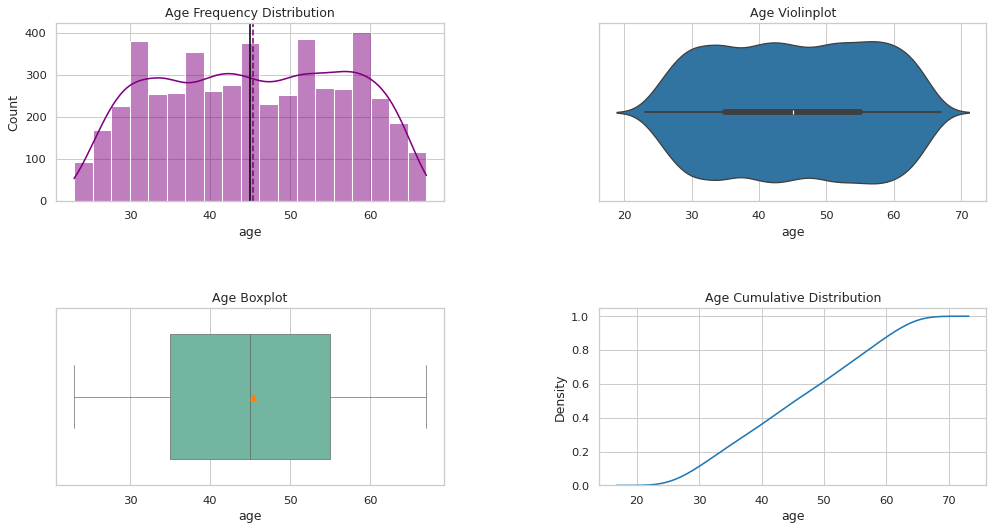




 Experience 


,Min,Max,Q1,Q2,Q3,IQR,Mode,Skewness,Range,Unique,Non-Missing,Zeroes Count
Value,0,43,10.00,20.00,30.00,20.00,32,-0.01,43,44,5000,66


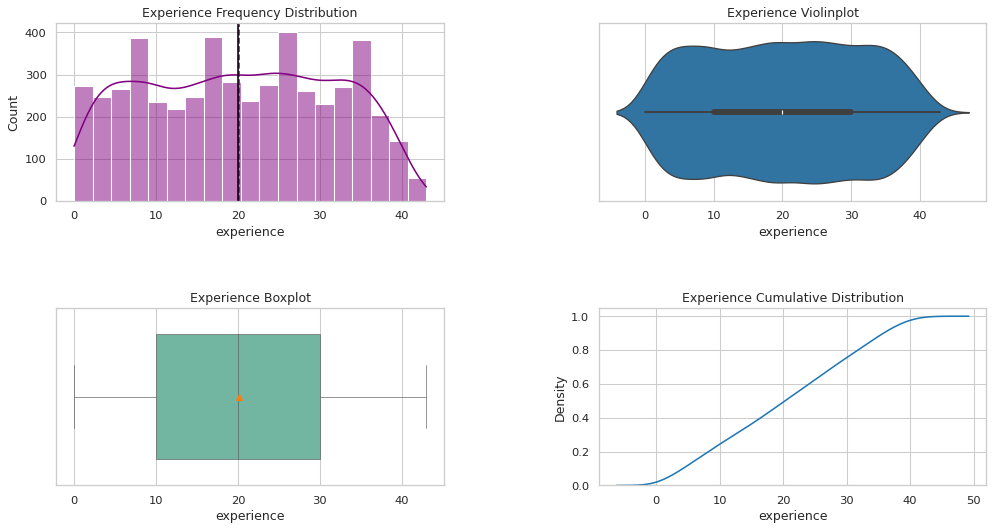




 Income 


,Min,Max,Q1,Q2,Q3,IQR,Mode,Skewness,Range,Unique,Non-Missing,Zeroes Count
Value,8,224,39.00,64.00,98.00,59.00,44,0.84,216,162,5000,0


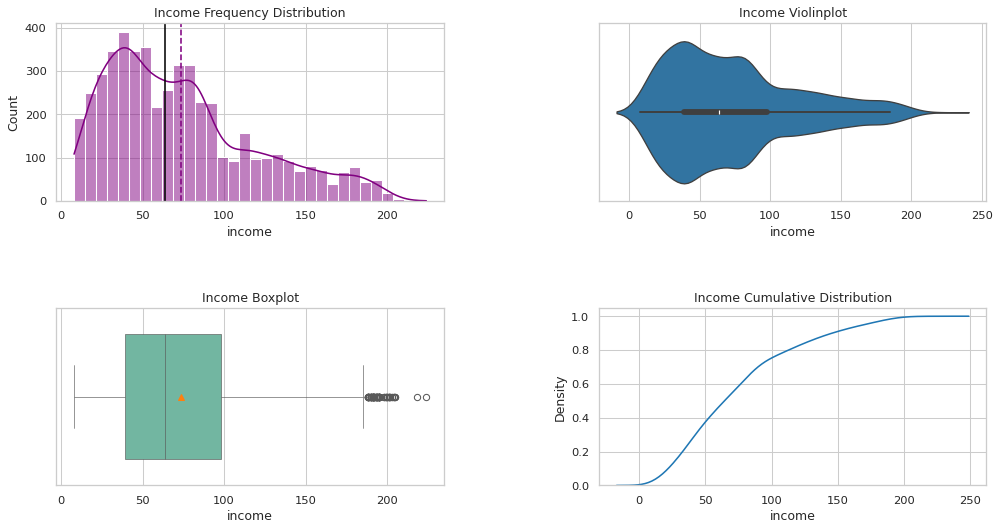




 Ccavg 


,Min,Max,Q1,Q2,Q3,IQR,Mode,Skewness,Range,Unique,Non-Missing,Zeroes Count
Value,0.00,10.00,0.70,1.50,2.50,1.80,0.30,1.60,10.00,108,5000,106


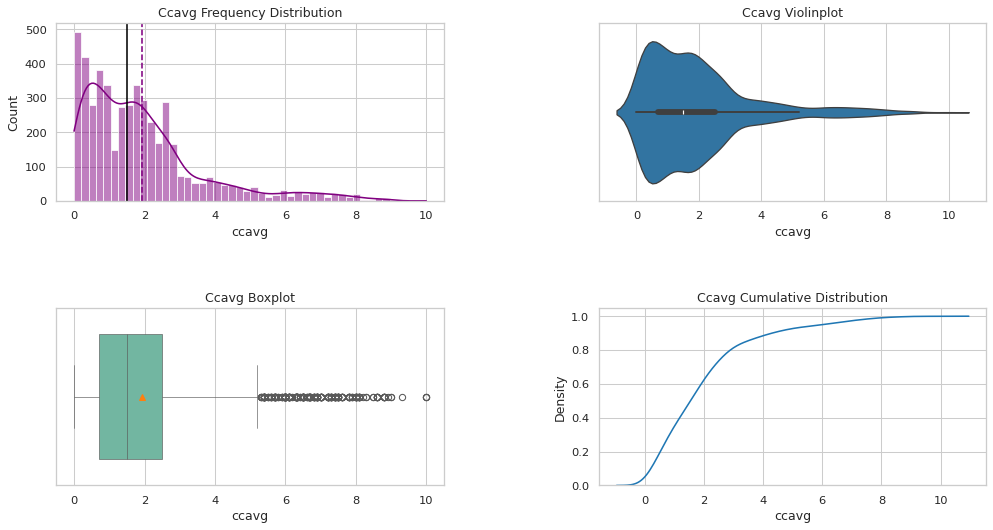




 Mortgage 


,Min,Max,Q1,Q2,Q3,IQR,Mode,Skewness,Range,Unique,Non-Missing,Zeroes Count
Value,0,635,0.00,0.00,101.00,101.00,0,2.10,635,347,5000,3462


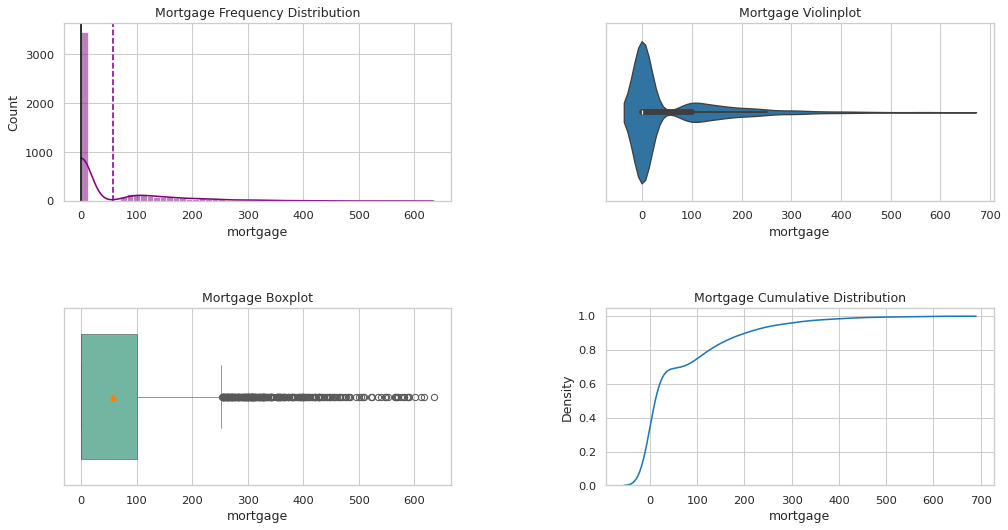

In [23]:
# Show plots and statitics
for col in df.select_dtypes(include=np.number):
  print('\033[1m', col.title(),'\033[0m')
  create_plots(df, col)
  print('\n\n')

**Observations**

Age:

- The average age is approx 45 years
- Ages range from 23 to 67 years
- Uniformly distribution

Experience:

- On average, individuals have around 20 years of experience.
- Experience ranges from 0 to 43 years. With a majority having 10-30

Income:

- The average annual income is approx 74k
- Income ranges from 8K to 224K
- Rightly Skewed

CCAvg:

- A large majority of customers have relatively low monthly credit card spending.
- Rightly Skewed

Mortgage:

- The average mortgage value is about 56.5K
- Mortgage values range from 0K to 635K
- A large proportion have no mortgage

Family:

- Customers with a family size of 3 are the largest group
- There are 4 groups
- Single families is the most common

Zipcode:

- Shows a concentration of customers in a few areas. This makes sense from a target marketing and operational point of view

Personal Loan:

- 9.6% of the individuals have a personal loan

Securities Account:

- 10.4% of individuals use a brokerage account

CD Account:

- 6.04%, have a CD's

Online:

- 59.68%, use online banking services

Creditcard:

- 29.4% use a credit card


###**Bi-Variate Analysis**


####**Define Functions**


In [24]:
# plot
def compare_personal_loan(df, columns):

    for col in columns:
        print('\n')
        print('\n')
        print(col.title())

        p_loan = df['personal_loan'].map({0:'No Loan', 1:'Loan'})
        fig = plt.figure(figsize=(20, 10), dpi=75)

        gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], width_ratios=[1, 1])

        # fig, axes = plt.subplots(2, 1, figsize=(16, 8), dpi=75)
        fig.subplots_adjust(hspace=0.6, wspace=0.6)

        ax_violin = fig.add_subplot(gs[0, 0])
        ax_bar = fig.add_subplot(gs[0, 1])
        ax_stacked = fig.add_subplot(gs[1, :])

        sns.set(style='whitegrid')

        # bar
        sns.barplot(x=p_loan, y=df[col], ax=ax_bar,  palette='plasma')
        ax_bar.set_title(f'Personal Loan vs {col.title()}')

        # violin.
        sns.violinplot(x=df[col], y=p_loan, palette='tab20', split=False, ax=ax_violin)
        ax_violin.set_title(f'Personal Loan vs {col.title()}')

        # hist
        sns.histplot(data=df, x=df[col], hue='personal_loan', multiple='stack', kde=True, palette='icefire',label='Loan', common_bins=True, ax=ax_stacked, legend=True)
        ax_stacked.set_title(f'Personal Loan vs {col.title()}')

        print('\n')
        fig.tight_layout()
        plt.show()

def plot_influence_on_loan(df, loan_column='personal_loan', columns=None, figsize=(15, 10), cmap='gist_heat'):

    if columns is None:
        columns = [col for col in df.columns if col != loan_column]
    columns = [col for col in df.columns if col != loan_column]
    grouped_data = df.groupby(loan_column)[columns].mean()
    grouped_data.plot(kind='bar', figsize=figsize, cmap=cmap)

    plt.title("Influence of Each Column on Personal Loan")
    plt.xlabel('Personal Loan')
    plt.ylabel('Average')
    plt.show()




####**Generate plots to compare against personal income**






Personal_Loan




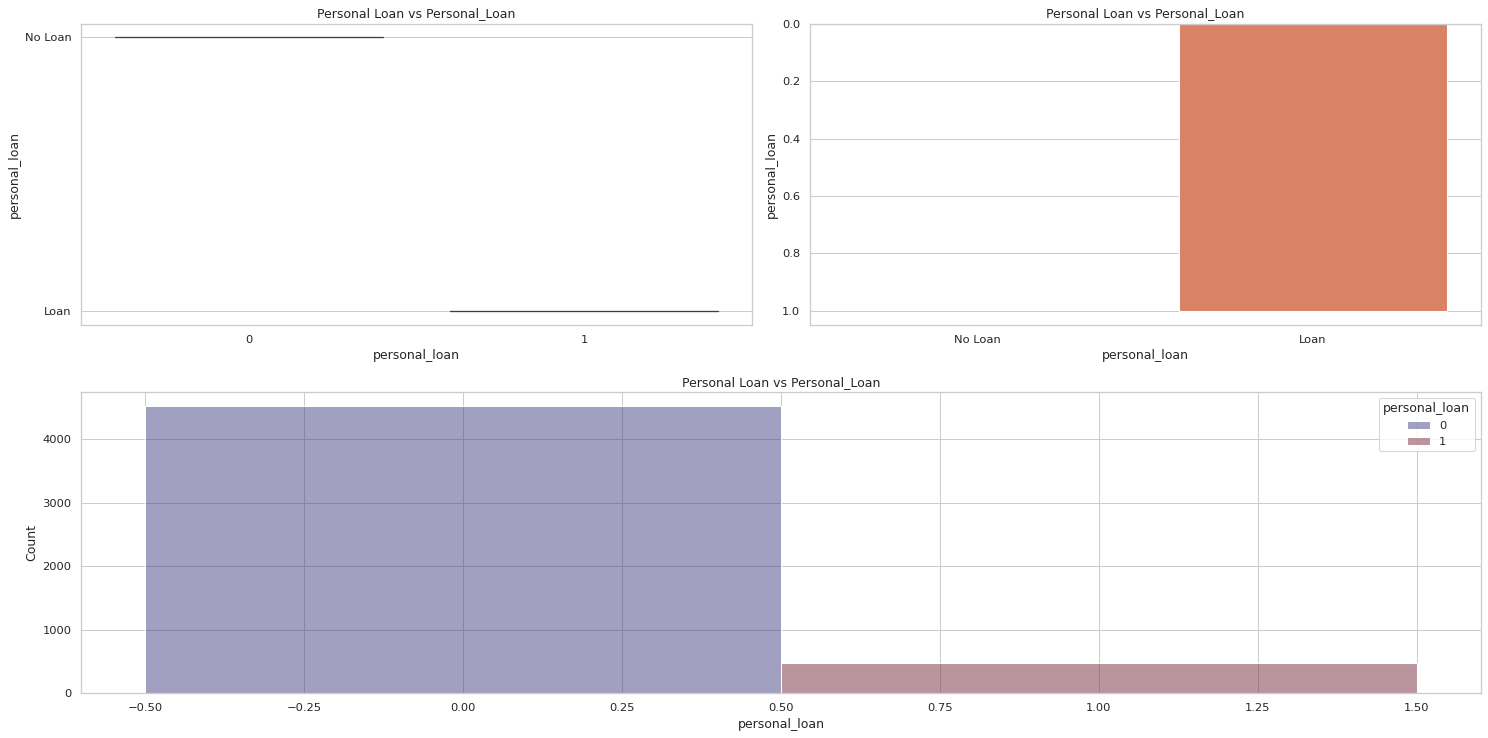





Age




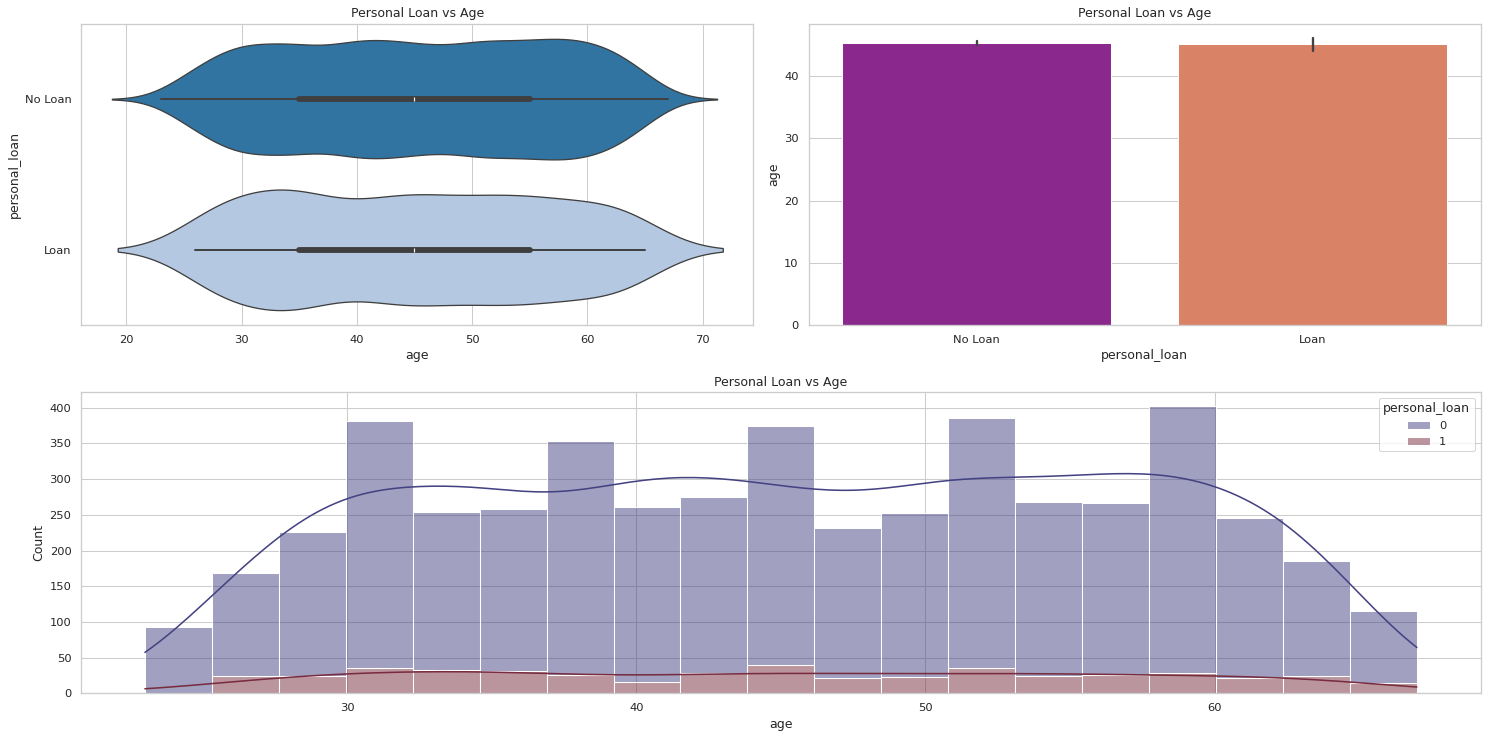





Income




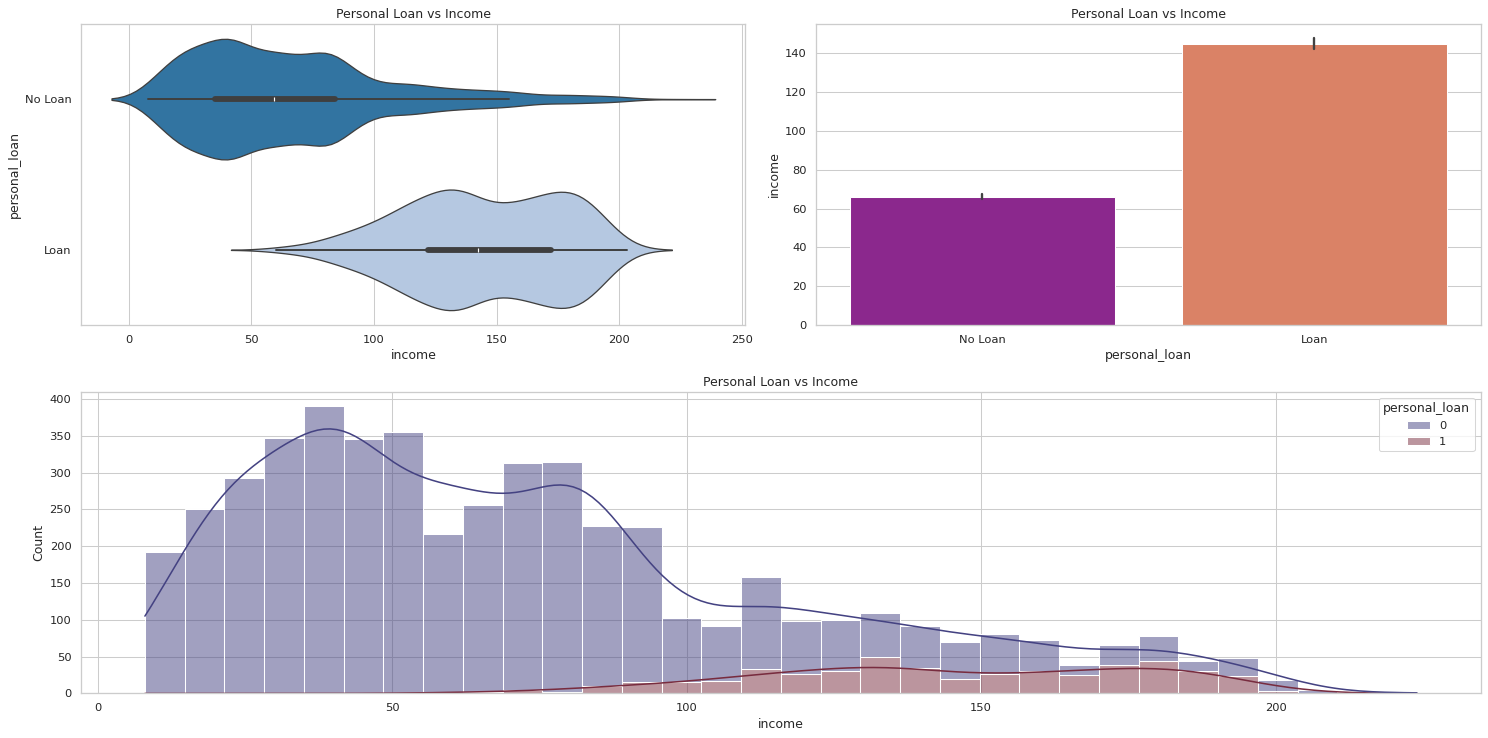





Ccavg




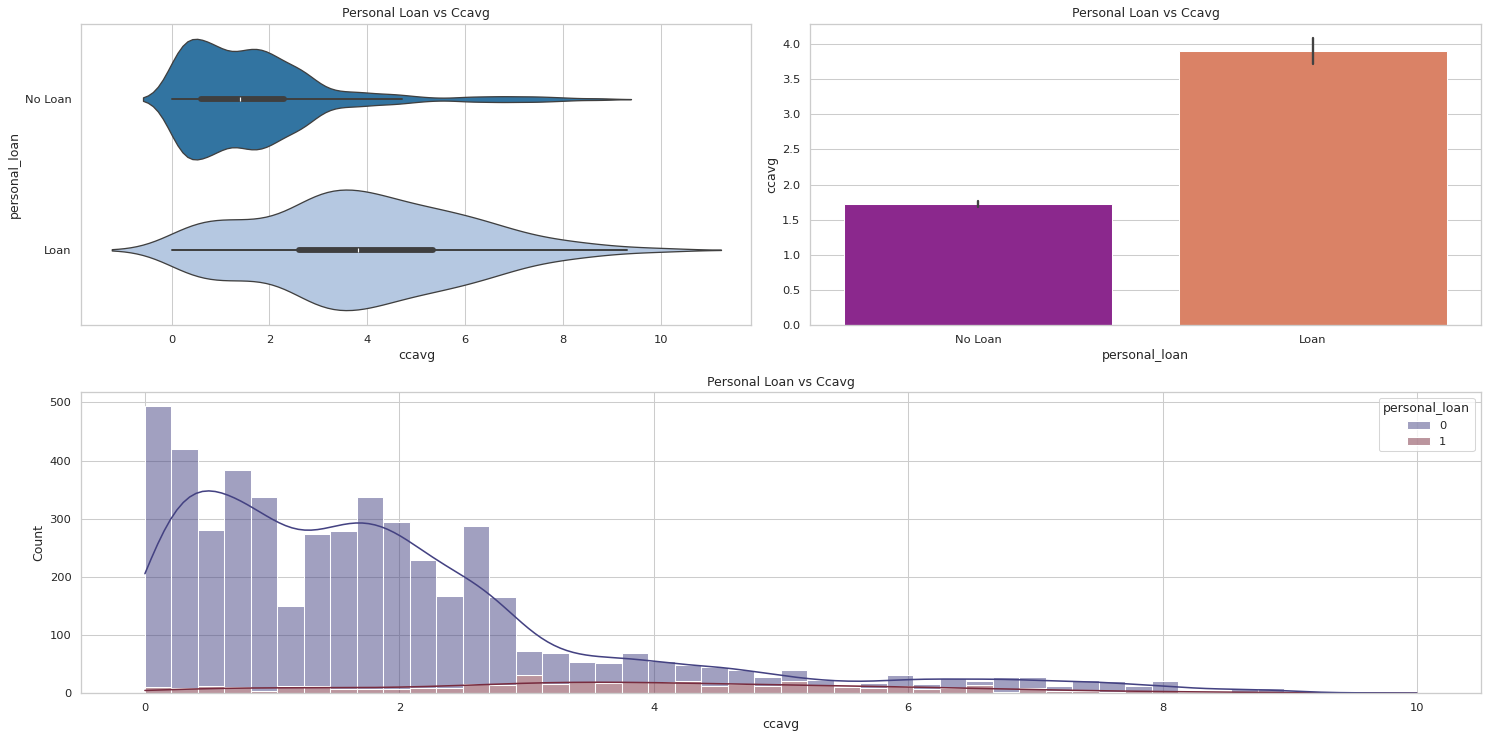





Family




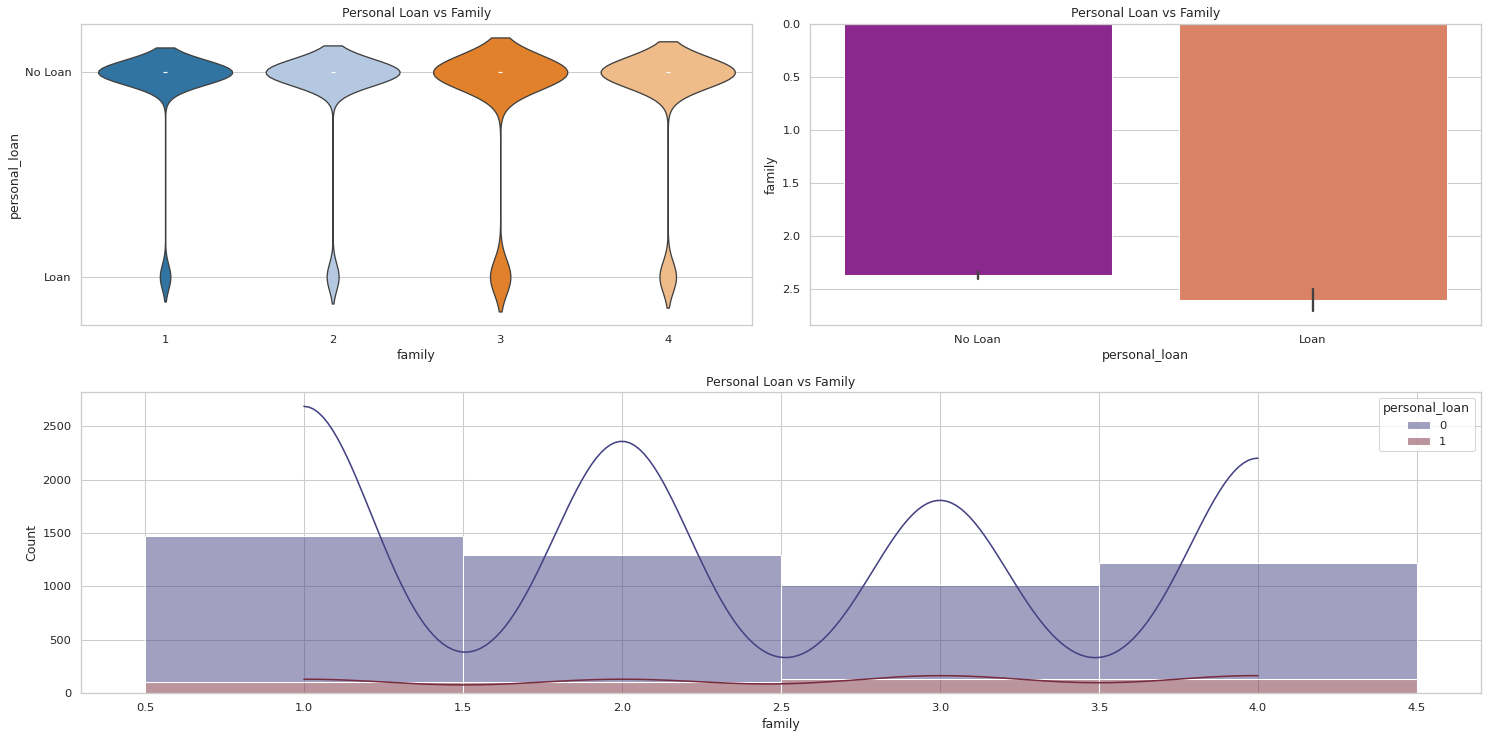





Education




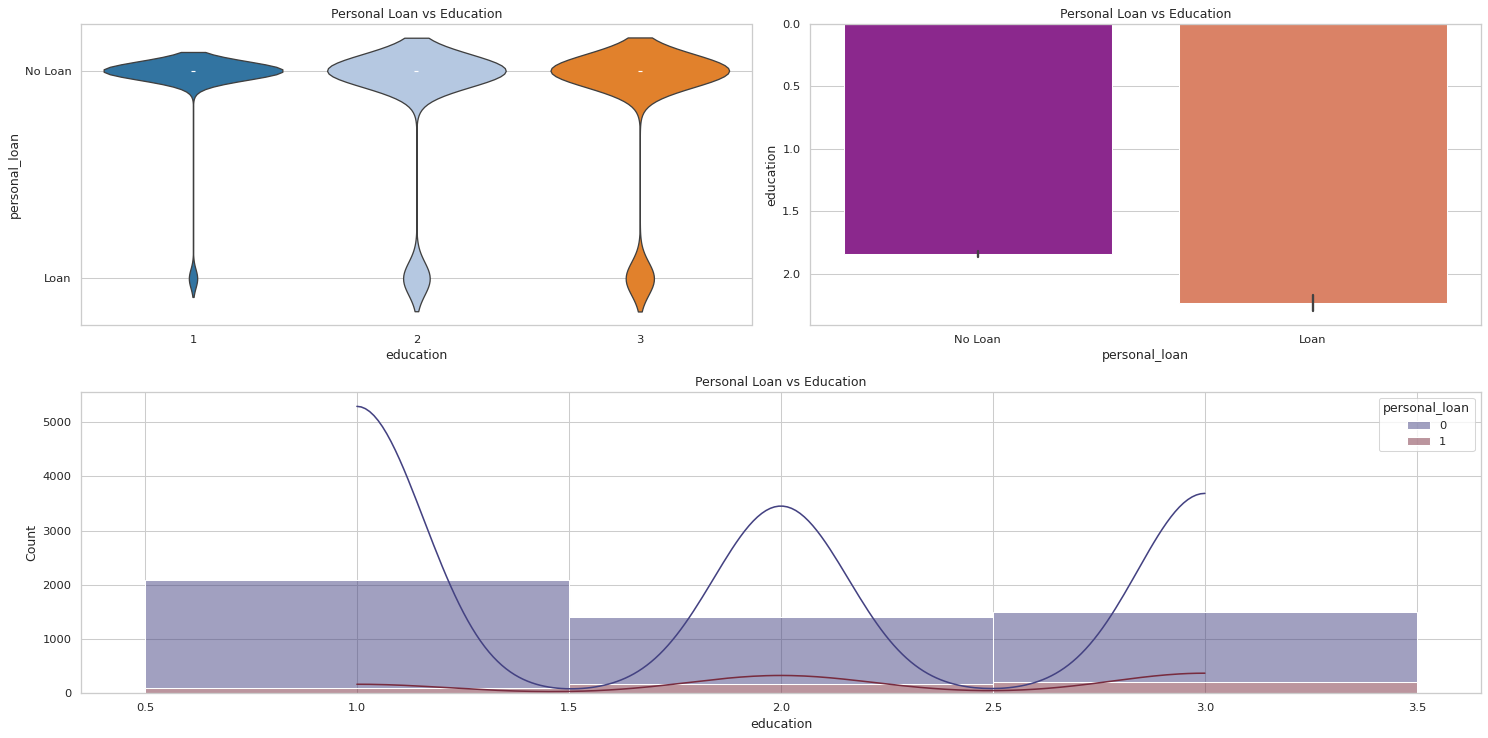





Securities_Account




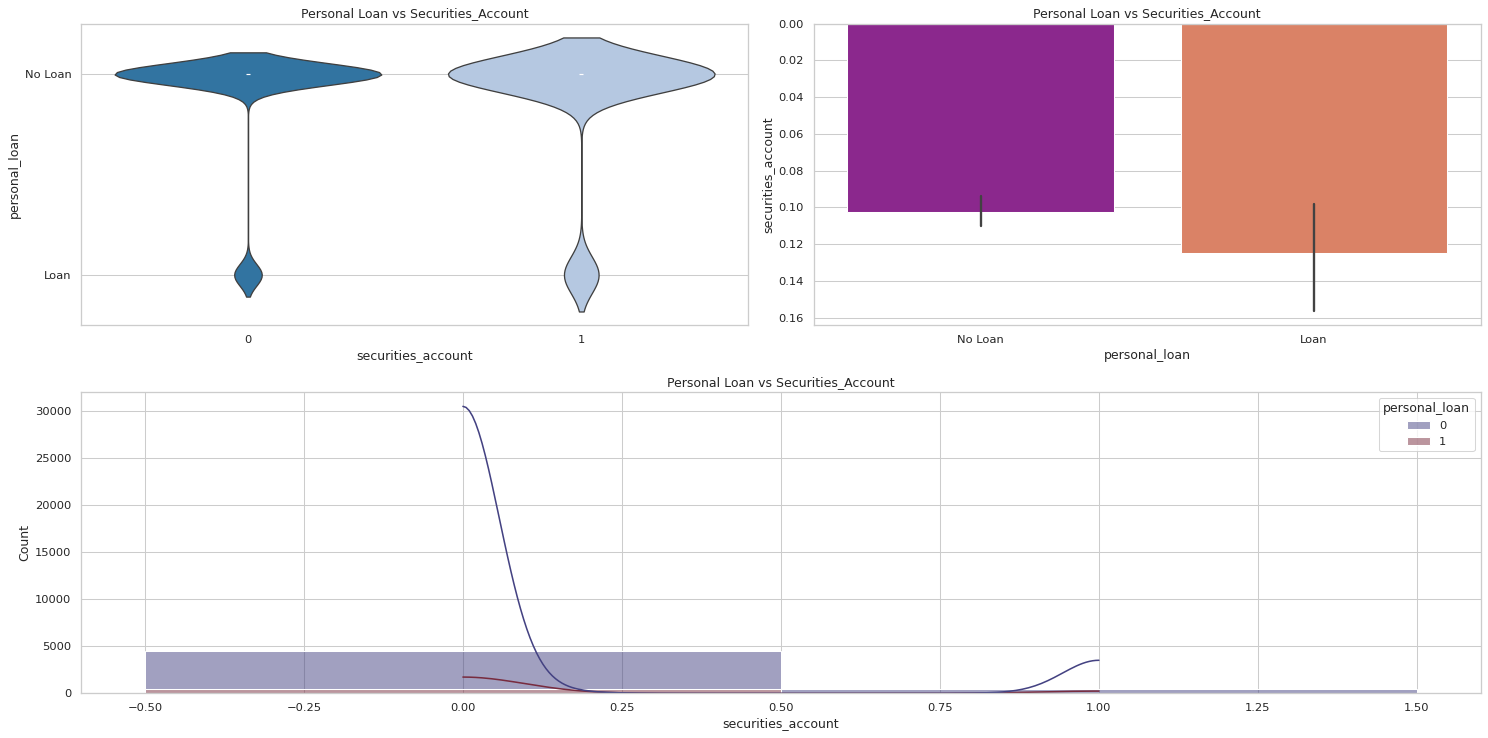





Cd_Account




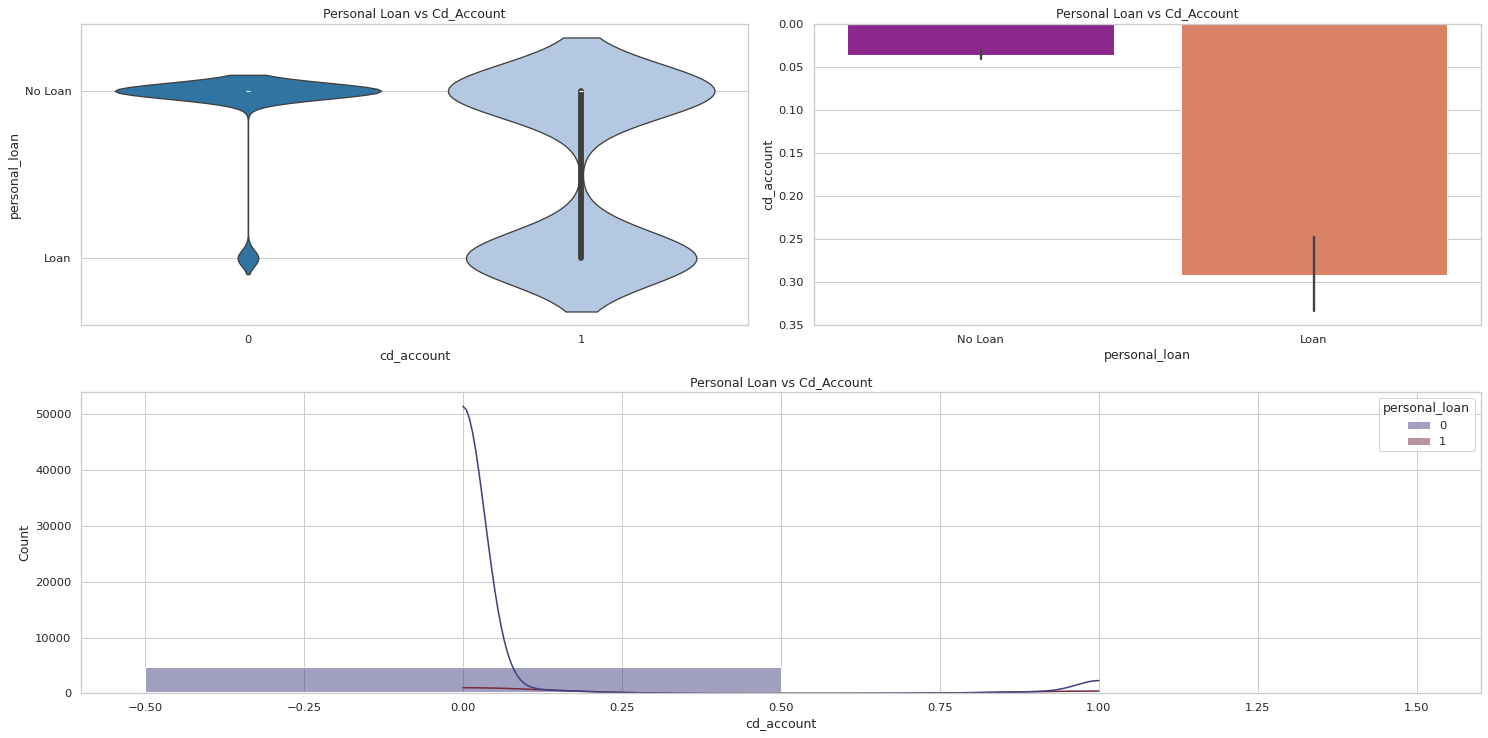





Online




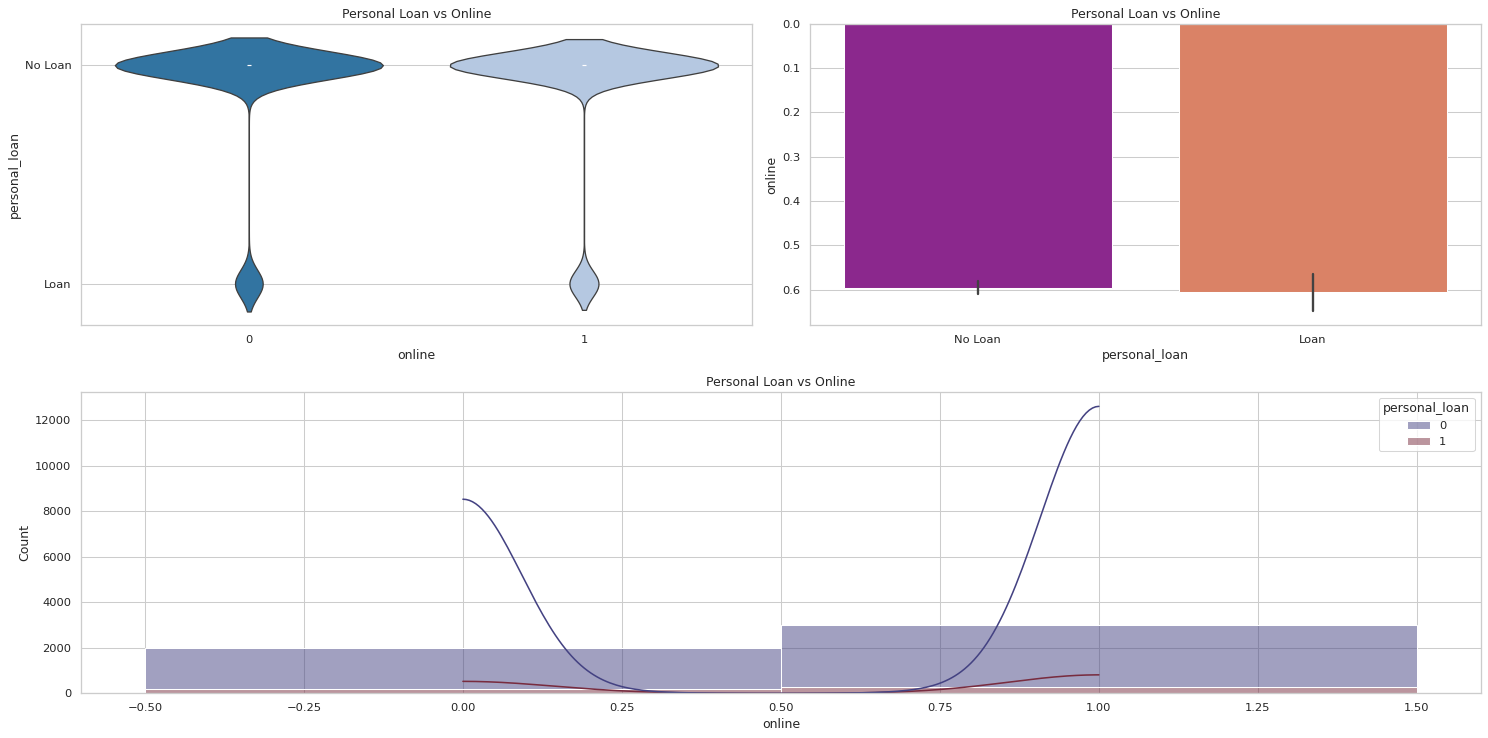





Creditcard




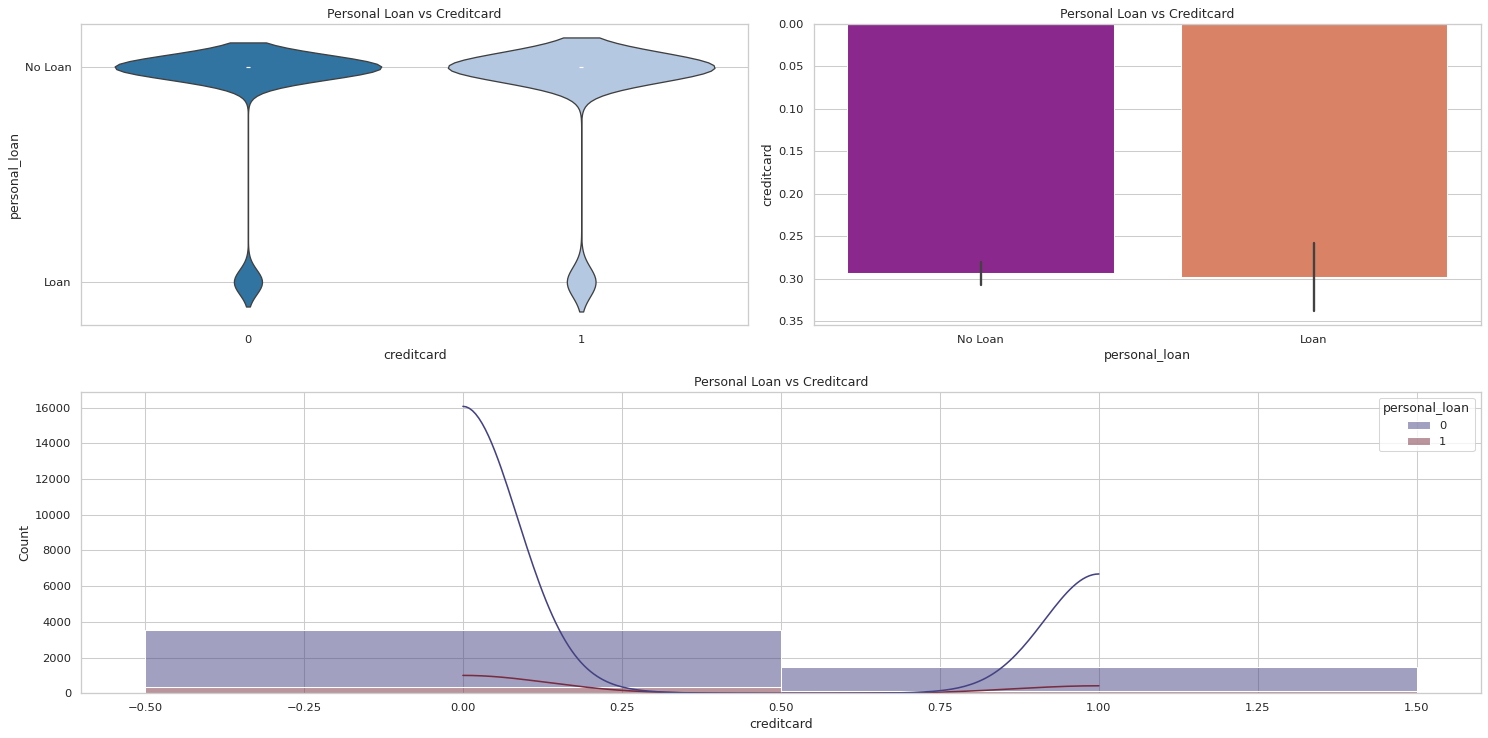





Zipcode




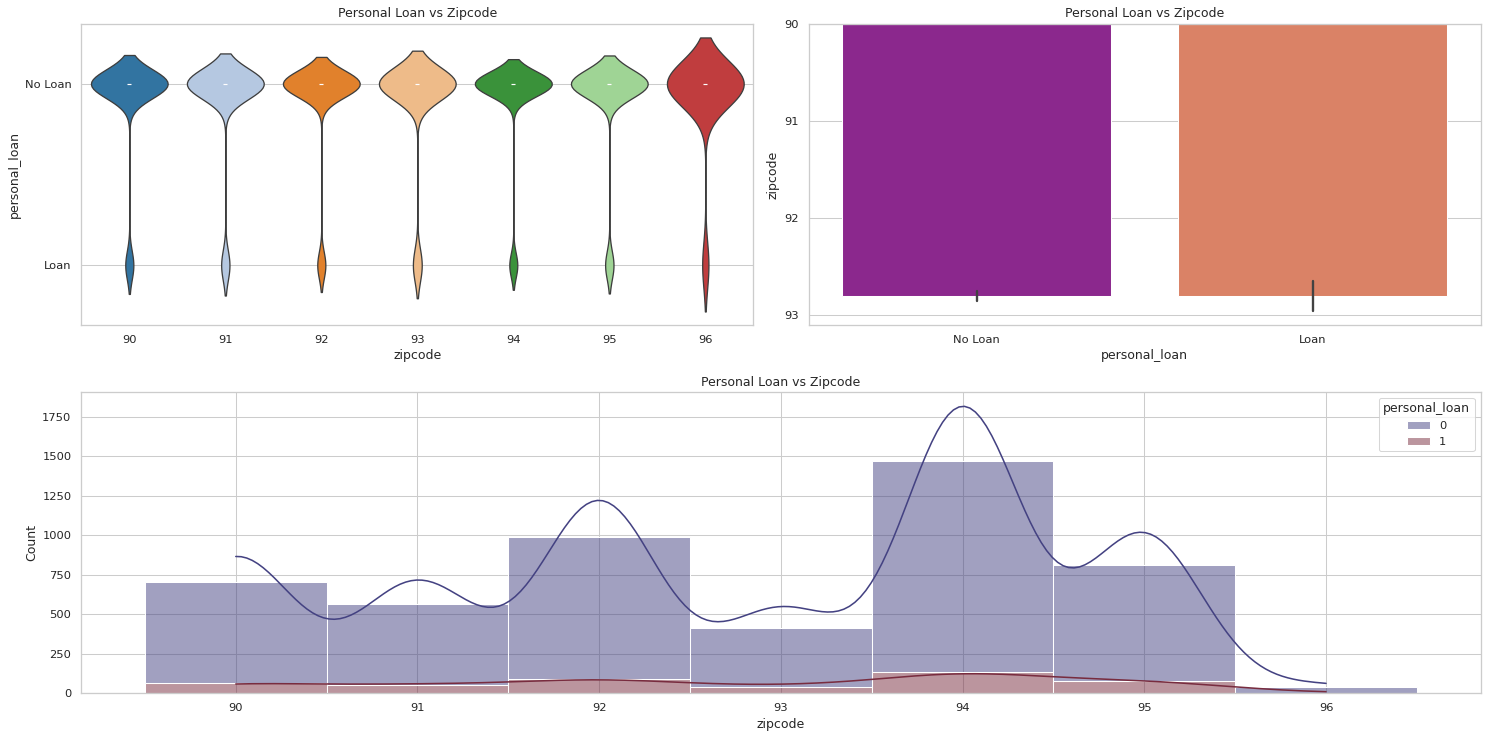





Mortgage




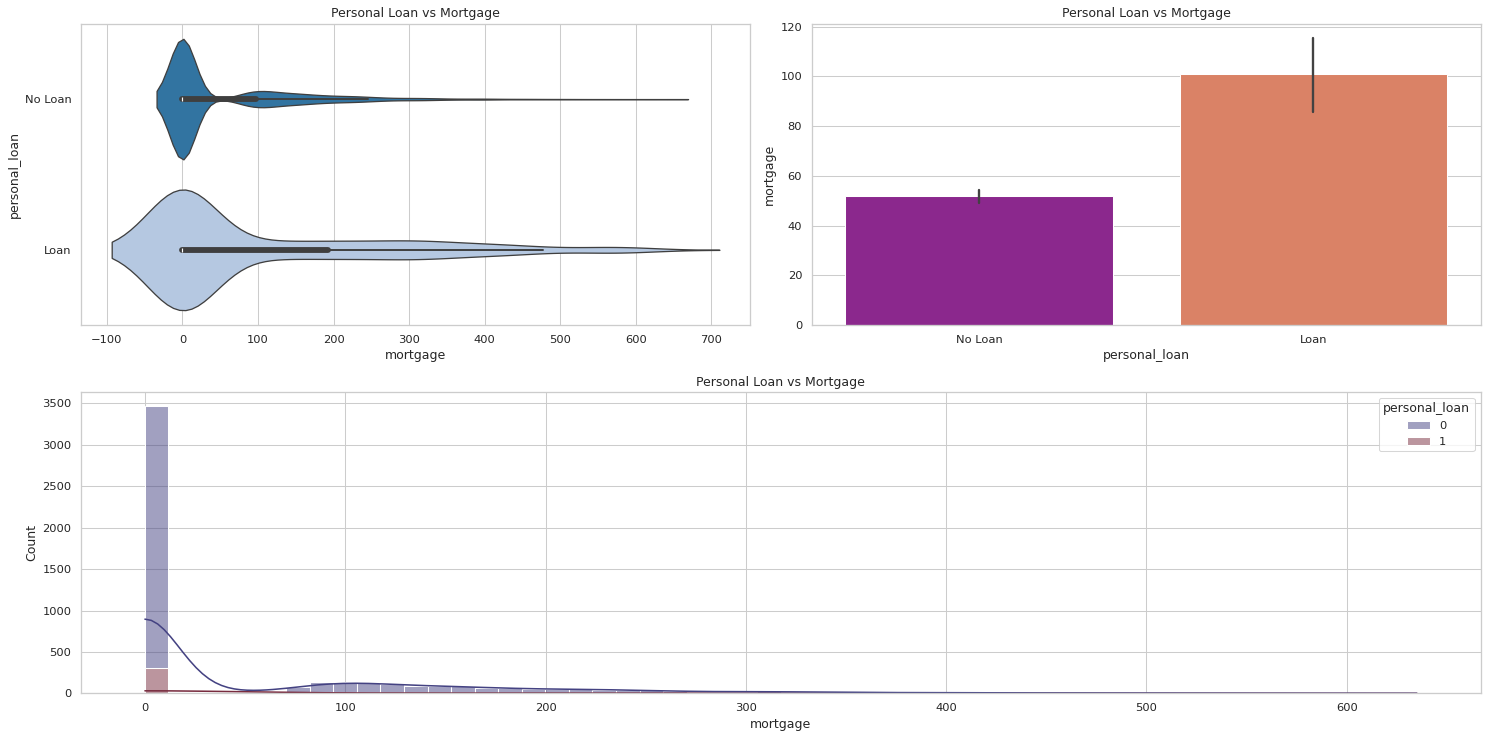

In [25]:
#generate plots to compare against personal income
columns_to_compare = ['personal_loan', 'age', 'income', 'ccavg', 'family', 'education', 'securities_account', 'cd_account', 'online', 'creditcard', 'zipcode', 'mortgage']
compare_personal_loan(df, columns_to_compare)

####**Correlation with the Target Attribute (Personal Loan)**


In [26]:
#creating and converting types for correlation analysis
binary_cols = ['personal_loan', 'securities_account', 'cd_account', 'online', 'creditcard']

df_encoded = pd.get_dummies(df, columns=['education'], drop_first=True)

df_encoded[binary_cols] = df_encoded[binary_cols].astype(int)

ploan_matrix = df_encoded.corr()

corr_ploan = ploan_matrix['personal_loan'].sort_values(ascending=False)

display(corr_ploan)

df_encoded = ''


personal_loan         1.00
income                0.50
ccavg                 0.37
cd_account            0.32
mortgage              0.14
education_3           0.09
education_2           0.07
securities_account    0.02
online                0.01
creditcard            0.00
age                  -0.01
experience           -0.01
Name: personal_loan, dtype: float64

In [27]:
df.head()

,age,experience,income,zipcode,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,creditcard
0,25,1,49,91,4,1.60,1,0,0,1,0,0,0
1,45,19,34,90,3,1.50,1,0,0,1,0,0,0
2,39,15,11,94,1,1.00,1,0,0,0,0,0,0
3,35,9,100,94,1,2.70,2,0,0,0,0,0,0
4,35,8,45,91,4,1.00,2,0,0,0,0,0,1


####**Observations**
Personal Loan:

- Roughly 90% of the customer base have not taken out a loan.

Age:

- The figure shows the distribution of customer work experience split by the binary Personal Loan variable.
  Individuals who accept Personal Loan have lower level of maximum experience in range.

Income:

- Positive correlation 0.50, suggests higher income levels are associated with a higher likelihood of taking a personal loan.

- CCAvg: Positive correlation 0.37, suggests that higher credit card spending is associated with a higher likelihood of taking a personal loan.

- CD Account: Positive correlation 0.32, suggests that having a CD account is associated with a higher likelihood of taking a personal loan.

- Mortgage: Positive correlation 0.14, suggests that higher mortgage values are slightly associated with a higher likelihood of taking a personal loan.

- Education Professional: Positive correlation 0.9, suggests that higher education levels are slightly associated with a higher likelihood of taking a personal loan.

- Others: The other variables have low or negative correlations. We will most likely eliminate these from the model


###**Multi-Variate Analysis**


####**Define Plot Functions**


In [83]:
def plot_correlation_matrix():
    corr_matrix = df.corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    fig, ax = plt.subplots(figsize=(15, 15), dpi=75)
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')
    sns.heatmap(corr_matrix, cmap='coolwarm', vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={'shrink': .5}, annot=True, mask=mask)
    plt.title('Correlation Matrix')
    plt.show()

def plot_pairs(df):
    plt.figure(figsize=(15,15), dpi=75)
    sns.set(palette='coolwarm')
    sns.pairplot(df, hue='personal_loan', markers=['o', 's', 'D'], corner=True)
    plt.title('Pair Plot')
    plt.show()

def plot_boxplots(data, cols):
  sns.set(palette='coolwarm')
  sns.set_style('white')

  plt.subplots_adjust(hspace=0.6, wspace=0.4)
  for y_col, x_col in cols:
      plt.figure(figsize=(15, 5), dpi=75)
      sns.boxplot(data=data, y=y_col, x=x_col, width=0.7, linewidth=0.6, showmeans=True, hue='personal_loan')
      plt.title(f'Personal Loan vs {y_col.capitalize()} vs {x_col.capitalize()}')
      plt.show()

def plot_personal_loan_distribution(df, column='personal_loan', title='People who have accepted a personal loan', palette='rocket_r'):
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame.")


    value_counts = df[column].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, palette=palette)

    plt.title(title)
    plt.xlabel('Personal Loan Status')
    plt.ylabel('Count')

    # Display the plot
    plt.show()

####**Plot Personal Loan Distribution**


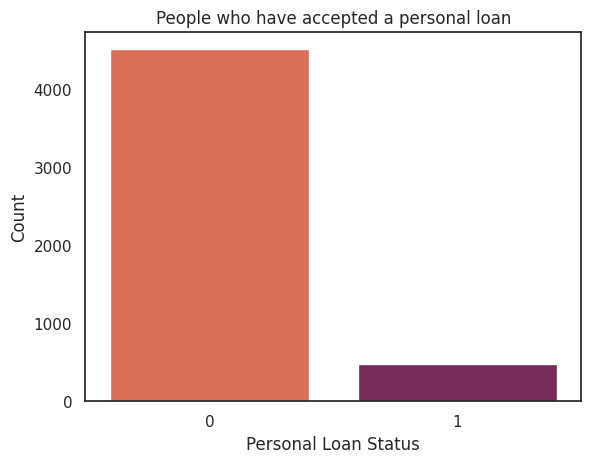

In [79]:
plot_personal_loan_distribution(df, column='personal_loan')

####**Plot Correlation Matrix**


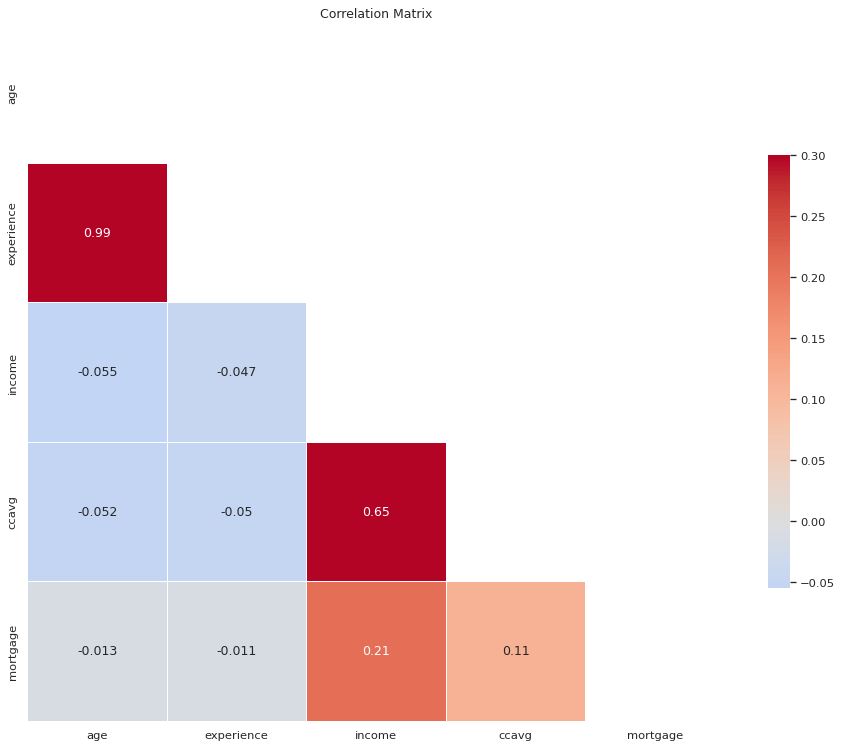

In [84]:
plot_correlation_matrix()

**Observations**

- Experience and age are highly correlated. This makes sense and we will remove one of these from the data set.

- Income, ccavg, cd_account correlate with personal_loan

- Income and ccavg also correlate

- Income, ccavg, personal_loan, cd_account, and mortgage all show a correlation


####**Pair Plot**


<Figure size 1125x1125 with 0 Axes>

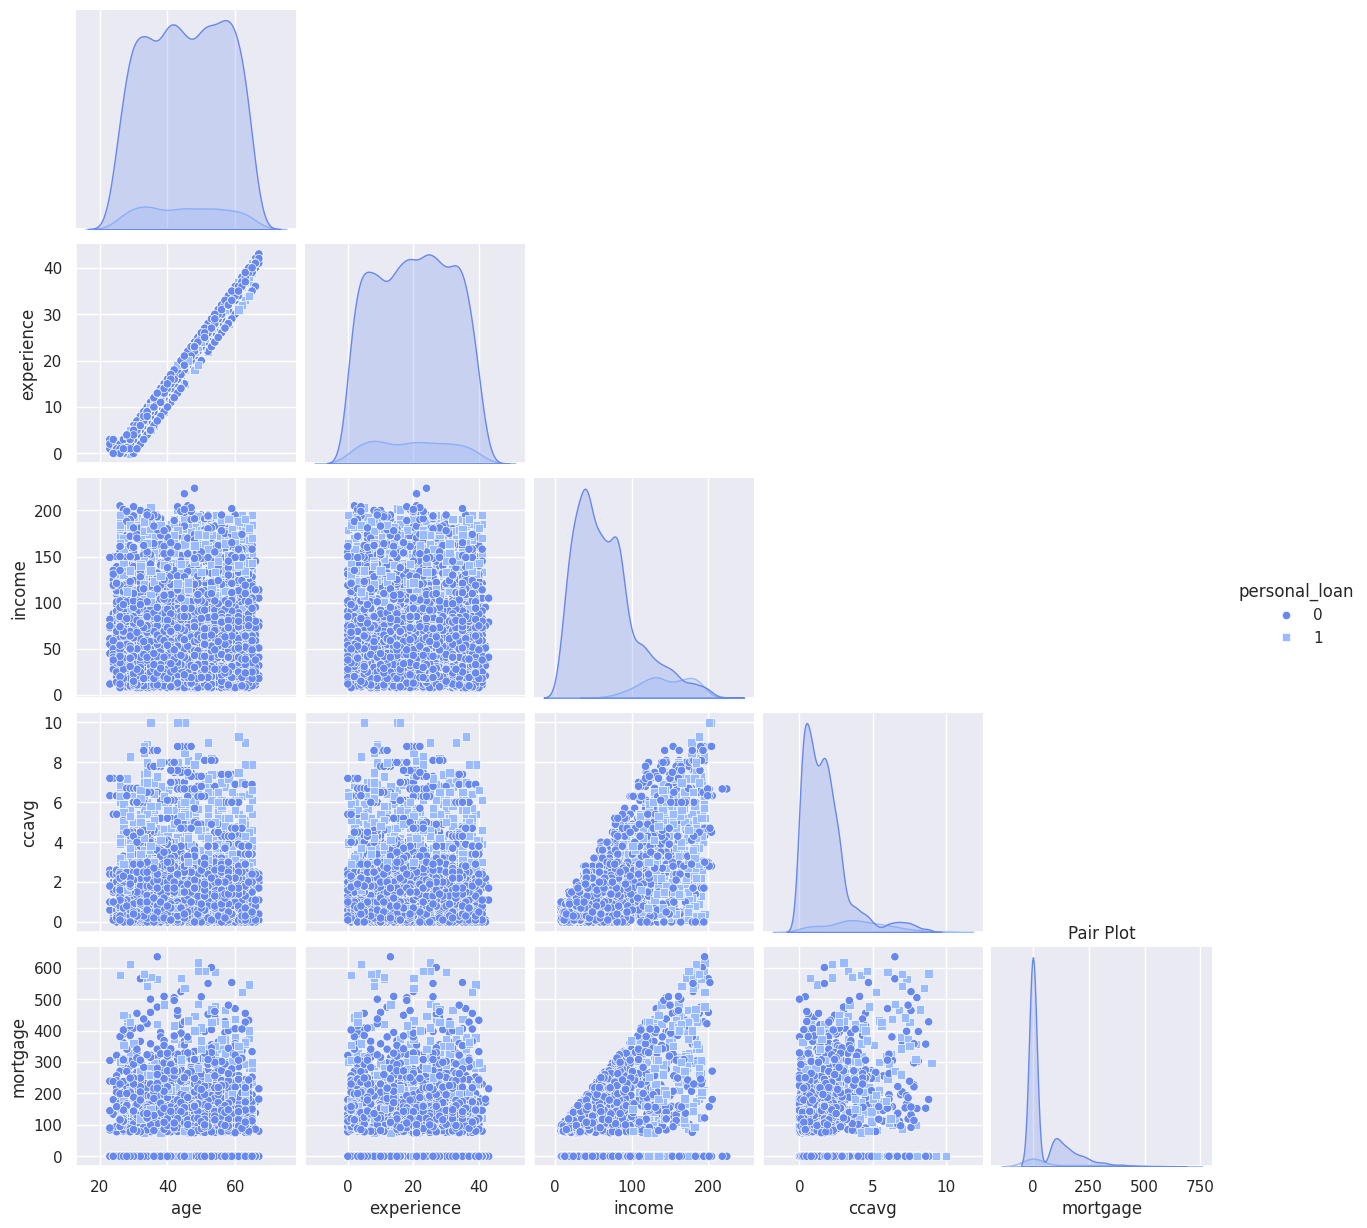

In [31]:
#Plot Pairs
plot_pairs(df)

####**Plot Boxplots**


<Figure size 640x480 with 0 Axes>

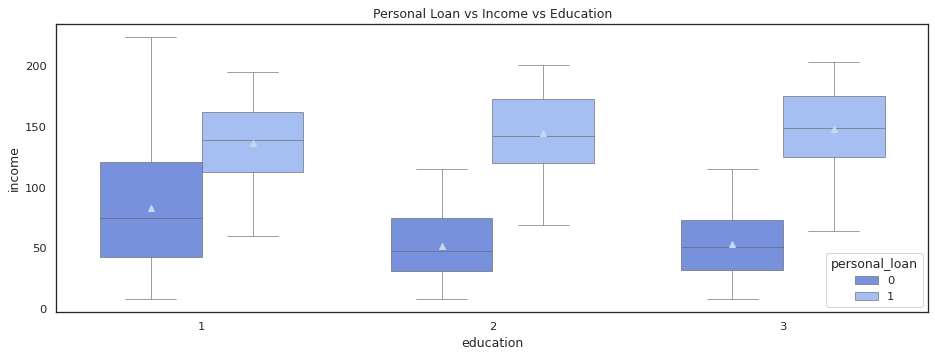

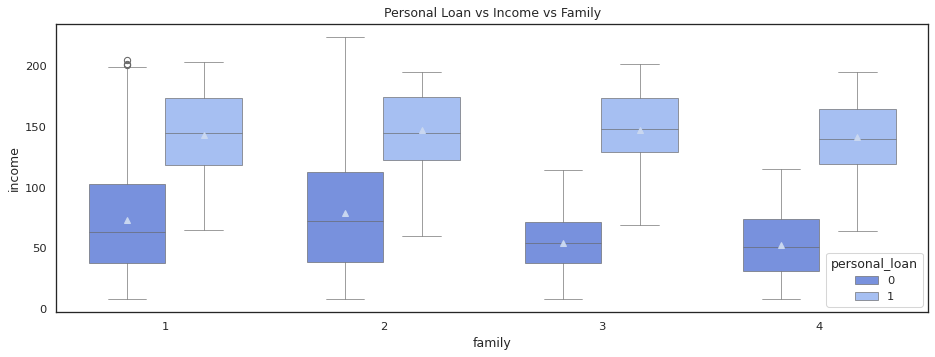

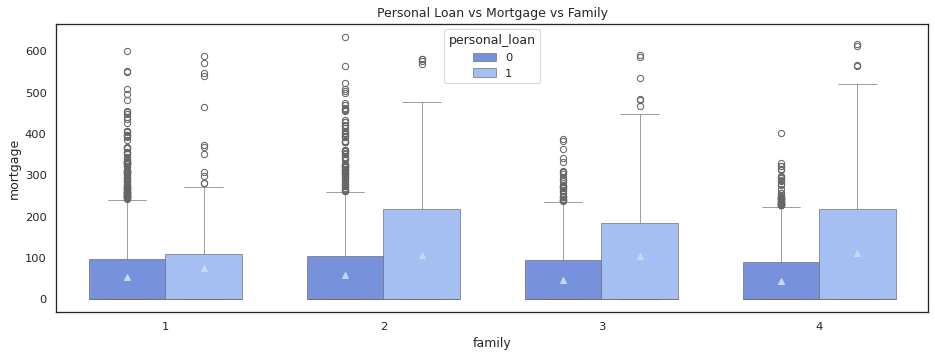

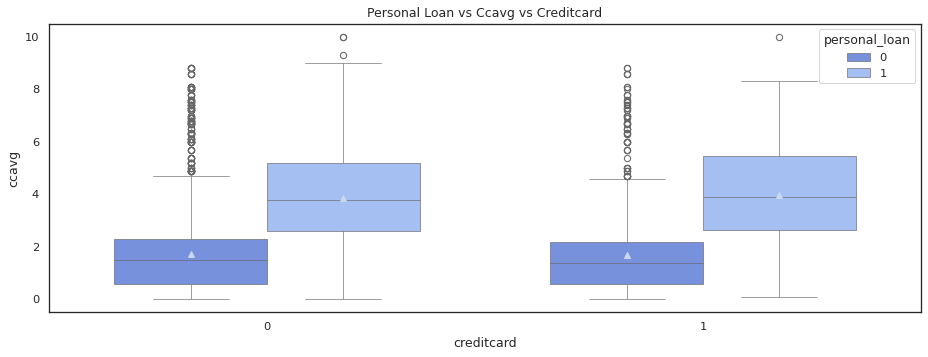

In [32]:
#Plot Boxplots
cols = [
    ('income', 'education'),
    ('income', 'family'),
    ('mortgage', 'family'),
    ('ccavg', 'creditcard')
]
plot_boxplots(df, cols)

###**EDA Observations**

- Customers with graduate and postgraduate degrees holding personal loans have significantly higher average incomes than those with only an undergraduate degree.

- Higher credit card expenditure is observed among individuals with personal loans.

- An uptick in family size correlates with increased mortgage amounts among personal loan holders.

- A significant number of outliers are found within the group of customers who do not have personal loans.

- Regardless of family size, those with personal loans consistently have higher income levels.

- For one or two-member families without personal loans, there's a higher incidence of outliers compared to other groups.

- With each increase in education level, average income also increases.

- The key determinants in the likelihood of acquiring a personal loan include:
  - Income
  - Education level
  - Mortgage amount
  - Average credit card spending (CCAvg)
  - Certificate of Deposit (CD) Account ownership


## Model Building


Model Evaluation Criterion


The Bank's should aim to efficiently convert customers to personal loan customers, the model evaluation should prioritize identifying propensity with precision. This requires a balance between high predictive accuracy and maximizing the identification of potential loan customers. However, greater the recall lesser the chances of false negatives and targeting th wrong customers.


##Prepare Data for Modeling


**Functions for outlier treatment**


In [33]:
def outlier_plot(df):
  plt.figure(figsize=(15, 5), dpi=75)
  for i, variable in enumerate(df):
      plt.subplot(1, 5, i + 1)
      plt.boxplot(df_model[variable])
      plt.tight_layout()
      plt.title(variable)
  plt.show()



def treat_outliers(df, col, inplace=False):
  if col not in df.columns:
      raise ValueError(f"Column {col} does not exist in DataFrame.")

  # Calculate IQR and whiskers
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  Lower_Whisker = Q1 - 1.5 * IQR
  Upper_Whisker = Q3 + 1.5 * IQR

  # Treat outliers
  if inplace:
      df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)
  else:
      df_modified = df.copy()
      df_modified[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)
      return df_modified


def treat_outliers_all(df, col_list):
  for c in col_list:
      df = treat_outliers(df, c)
  return df

In [34]:
df.head()

,age,experience,income,zipcode,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,creditcard
0,25,1,49,91,4,1.60,1,0,0,1,0,0,0
1,45,19,34,90,3,1.50,1,0,0,1,0,0,0
2,39,15,11,94,1,1.00,1,0,0,0,0,0,0
3,35,9,100,94,1,2.70,2,0,0,0,0,0,0
4,35,8,45,91,4,1.00,2,0,0,0,0,0,1


In [35]:
# convert catagerocial features to to categorical
categorical_columns = [
    "education",
    "personal_loan",
    "securities_account",
    "cd_account",
    "online",
    "creditcard"
]
for column in categorical_columns:
    df[column] = pd.Categorical(df[column])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   age                 5000 non-null   int64   
 1   experience          5000 non-null   int64   
 2   income              5000 non-null   int64   
 3   zipcode             5000 non-null   category
 4   family              5000 non-null   category
 5   ccavg               5000 non-null   float64 
 6   education           5000 non-null   category
 7   mortgage            5000 non-null   int64   
 8   personal_loan       5000 non-null   category
 9   securities_account  5000 non-null   category
 10  cd_account          5000 non-null   category
 11  online              5000 non-null   category
 12  creditcard          5000 non-null   category
dtypes: category(8), float64(1), int64(4)
memory usage: 235.8 KB


####**Visualizing Outliers and Dropping Columns**


In [36]:
# dropping columns which will not be needed for modelling
# create coply of df and instatiate data utilit with new df_model
df_model = df.copy()
utils = DataUtility(df_model)
utils.drop_column('personal_loan')
utils.drop_column('experience')
utils.drop_column('zipcode')


# num_cols = df_model.select_dtypes(include=np.number).columns.tolist()
# outlier_plot(num_cols)

X = df.drop(['personal_loan', "experience"], axis=1)
y = df["personal_loan"]

# Get dummies for categorical variables that are objects
X = pd.get_dummies(X, columns=['education'], drop_first=True)
X.head()




,age,income,zipcode,family,ccavg,mortgage,securities_account,cd_account,online,creditcard,education_2,education_3
0,25,49,91,4,1.60,0,1,0,0,0,0,0
1,45,34,90,3,1.50,0,1,0,0,0,0,0
2,39,11,94,1,1.00,0,0,0,0,0,0,0
3,35,100,94,1,2.70,0,0,0,0,0,1,0
4,35,45,91,4,1.00,0,0,0,0,1,1,0


In [37]:
# #verify
df_model.describe().T


,count,mean,std,min,25%,50%,75%,max
age,5000.00,45.34,11.46,23.00,35.00,45.00,55.00,67.00
income,5000.00,73.77,46.03,8.00,39.00,64.00,98.00,224.00
ccavg,5000.00,1.94,1.75,0.00,0.70,1.50,2.50,10.00
mortgage,5000.00,56.50,101.71,0.00,0.00,0.00,101.00,635.00


####**Train and Split**


In [38]:
# Spliting data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Confirming the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500, 12), (1500, 12), (3500,), (1500,))

###**Scoring Decision Tree**


In [39]:
def make_confusion_matrix(model, predictors, target, labels=[1, 0]):

    y_predict = model.predict(predictors)

    cm=metrics.confusion_matrix(target, y_predict, labels=[0, 1])

    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])

    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]


    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]

    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)

    plt.figure(figsize = (8,6))

    sns.heatmap(df_cm, annot=labels,fmt='')

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def get_recall_score(model):
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ", metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ", metrics.recall_score(y_test,pred_test))


#Decision Tree: Initial Build


In [40]:
d_tree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
d_tree.fit(X_train, y_train)



DecisionTreeClassifier(random_state=1)

###**Confusion Matrix (1)**


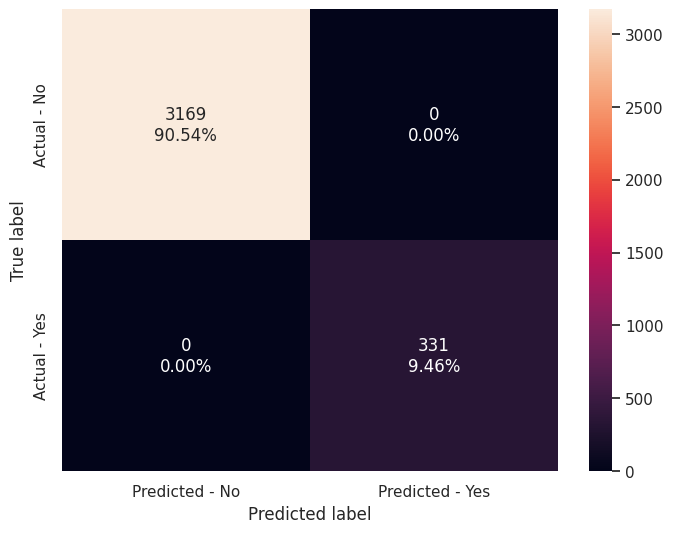

In [41]:
make_confusion_matrix(d_tree, X_train, y_train)

###**Visualizing the Decision Tree (1)**


In [42]:
feature_names = list(X.columns)
print(feature_names)

['age', 'income', 'zipcode', 'family', 'ccavg', 'mortgage', 'securities_account', 'cd_account', 'online', 'creditcard', 'education_2', 'education_3']


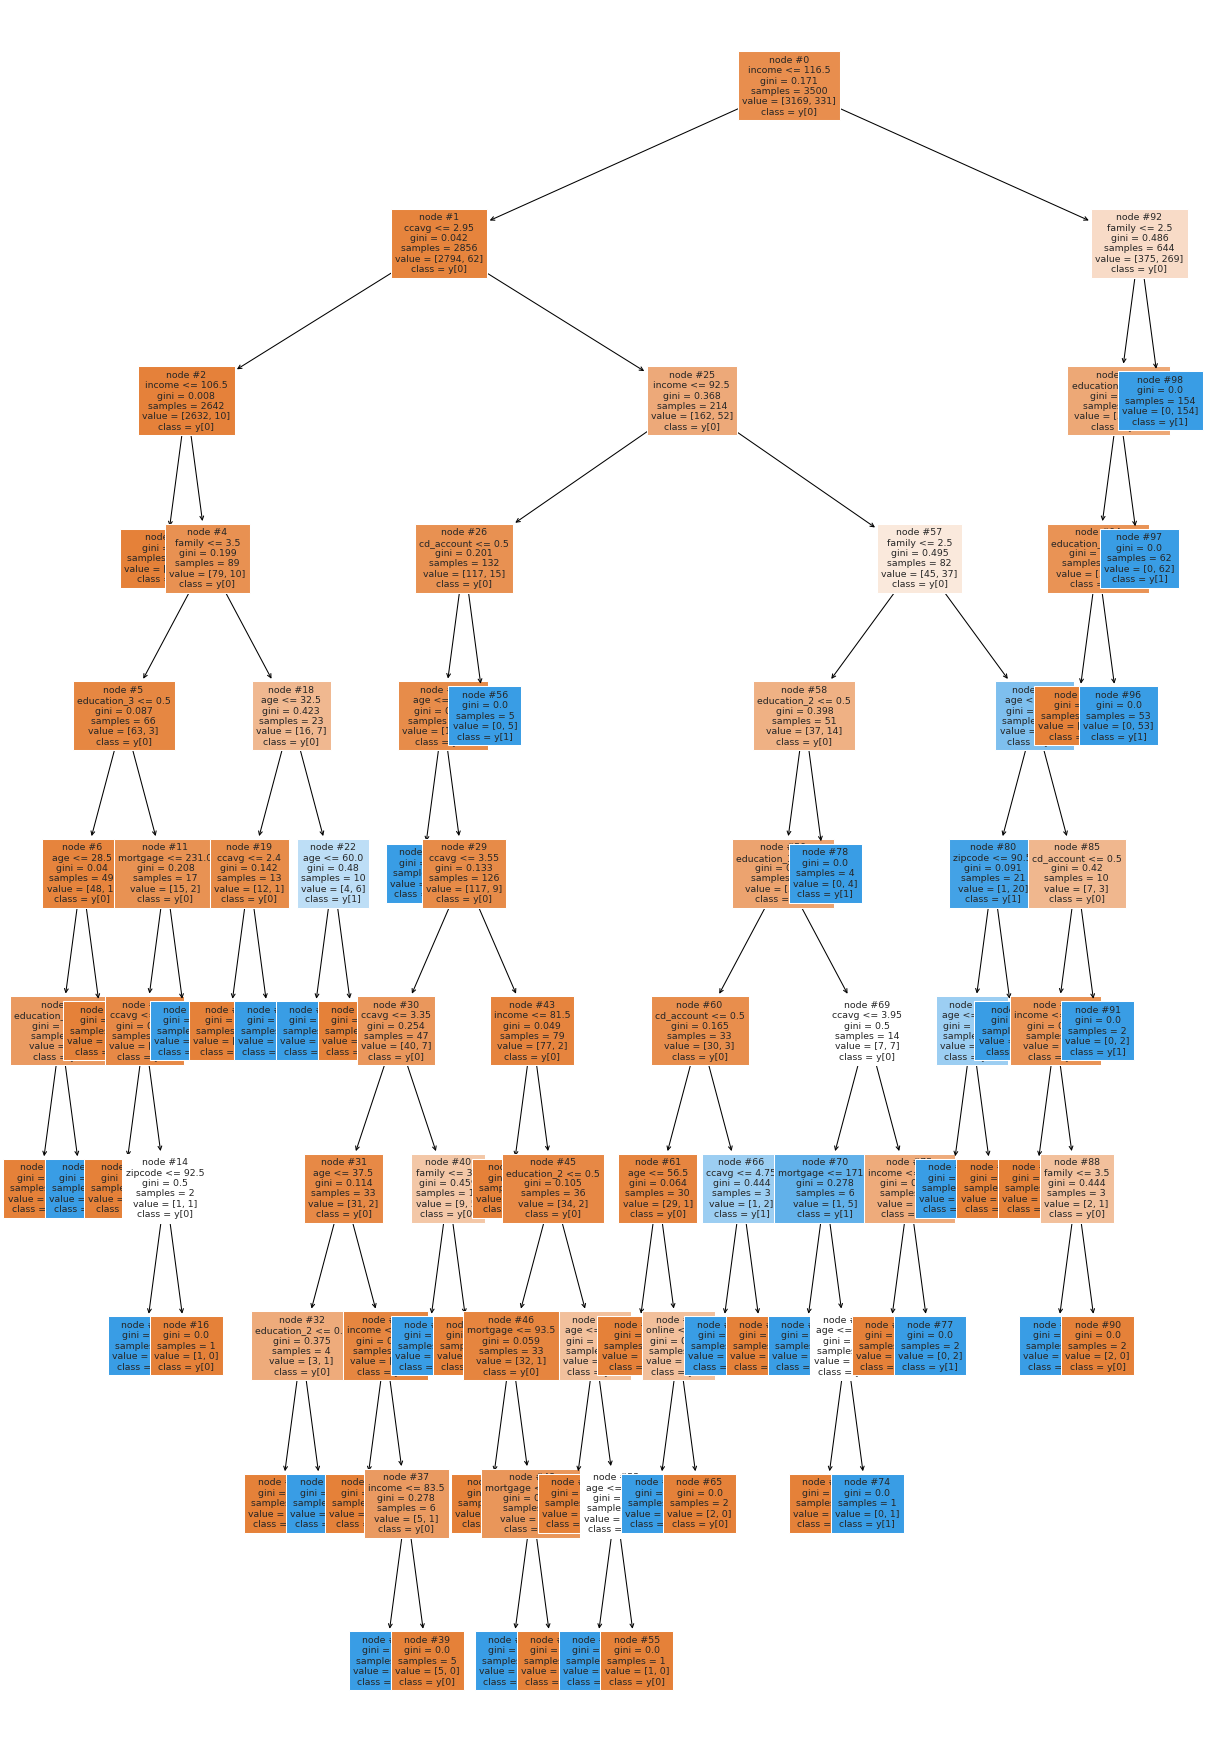

In [43]:
plt.figure(figsize=(20,30), dpi=75)
out = tree.plot_tree(d_tree, feature_names=feature_names, filled=True, fontsize=9, node_ids=True, class_names=True) #max_depth=6
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()


In [44]:
# decision tree rules
print(tree.export_text(d_tree,feature_names=feature_names,show_weights=True))

|--- income <= 116.50
|   |--- ccavg <= 2.95
|   |   |--- income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- income >  106.50
|   |   |   |--- family <= 3.50
|   |   |   |   |--- education_3 <= 0.50
|   |   |   |   |   |--- age <= 28.50
|   |   |   |   |   |   |--- education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- age >  28.50
|   |   |   |   |   |   |--- weights: [43.00, 0.00] class: 0
|   |   |   |   |--- education_3 >  0.50
|   |   |   |   |   |--- mortgage <= 231.00
|   |   |   |   |   |   |--- ccavg <= 1.95
|   |   |   |   |   |   |   |--- weights: [14.00, 0.00] class: 0
|   |   |   |   |   |   |--- ccavg >  1.95
|   |   |   |   |   |   |   |--- zipcode <= 92.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |--- zipcode >  92.50
|   

### **Feature Importance (1)**


In [45]:
# Gini importance: importance of features in the tree building.
print(pd.DataFrame(d_tree.feature_importances_, columns = ['Imp'], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                    Imp
income             0.31
family             0.26
education_2        0.17
education_3        0.14
ccavg              0.05
age                0.03
cd_account         0.02
mortgage           0.01
zipcode            0.00
online             0.00
securities_account 0.00
creditcard         0.00


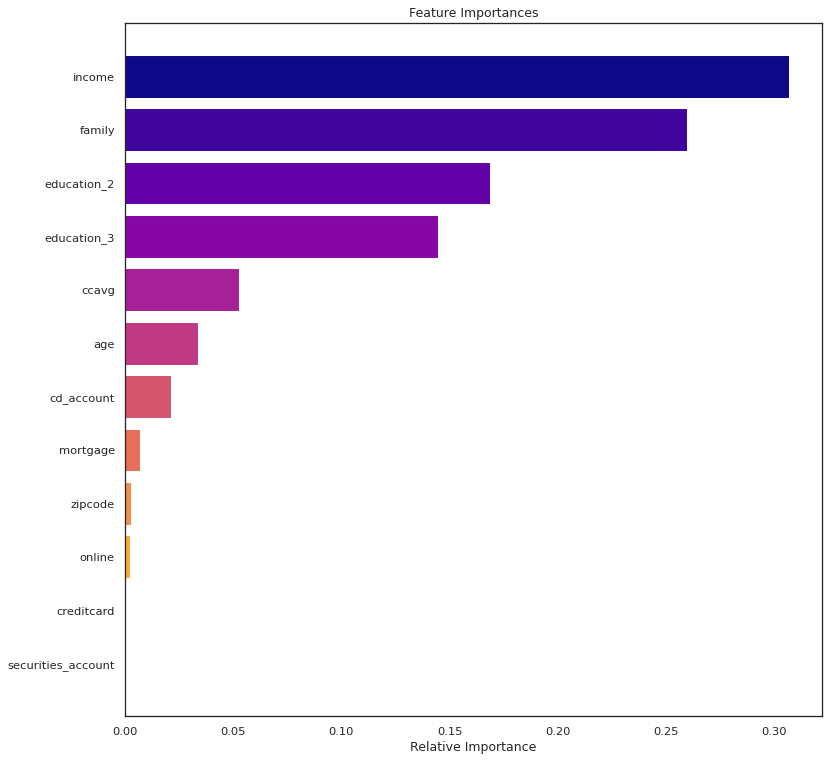

In [46]:
importances = d_tree.feature_importances_
indices = np.argsort(importances)
cmap = plt.get_cmap('plasma')
colors = cmap(np.linspace(0, 1, len(indices)))[::-1]
plt.figure(figsize=(12, 12), dpi=75)
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.show()



####**Observation:**

- The model shows income as the most important feature, followed by family and education.

- The tree appears to be over-fitting, accuracy on train 100% and test 99%, recall on test is 91%


In [47]:
print("Accuracy on training set : ",d_tree.score(X_train, y_train))
print("Accuracy on test set : ",d_tree.score(X_test, y_test))
get_recall_score(d_tree)

Accuracy on training set :  1.0
Accuracy on test set :  0.984
Recall on training set :  1.0
Recall on test set :  0.8993288590604027


# Model Performance Improvement


#Decision Tree: Pre-pruning w/ Grid Search


###**Pre-Pruning:** Reduce Over Fitting


In [48]:
def run_grid_search(estimator, param_grid, scoring_metric, cv_folds, X_train, y_train):
    grid_obj = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring=scoring_metric, cv=cv_folds)
    grid_obj.fit(X_train, y_train)
    print('Best Parameters: ', grid_obj.best_params_)
    print('Best Score: ', grid_obj.best_score_)
    return grid_obj.best_estimator_


In [49]:
estimator = DecisionTreeClassifier(random_state=1)
parameters = {
  'class_weight': [None, 'balanced'],
  'max_depth': np.arange(2,15, 2),
  'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
  'max_leaf_nodes' : [2, 3, 5, 10],
  "min_samples_split": [10, 30, 50, 70],
}
scoring_metric = make_scorer(recall_score)
cv_folds = 5

d_tree2 = run_grid_search(estimator, parameters, scoring_metric, cv_folds, X_train, y_train)


Best Parameters:  {'class_weight': 'balanced', 'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Score:  0.9969696969696968


###**Confusion Matrix (2)**


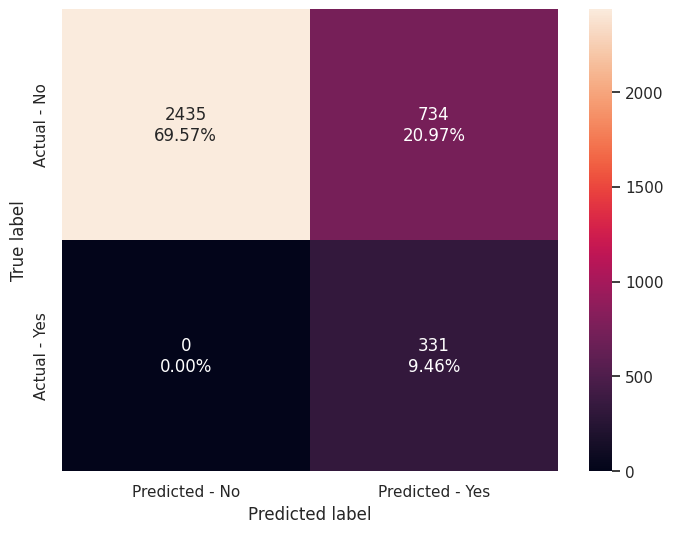

In [50]:
make_confusion_matrix(d_tree2, X_train, y_train)


In [51]:
print("Accuracy on training set : ", d_tree2.score(X_train, y_train))
print("Accuracy on test set : ", d_tree2.score(X_test, y_test))
get_recall_score(d_tree2)

Accuracy on training set :  0.7902857142857143
Accuracy on test set :  0.7793333333333333
Recall on training set :  1.0
Recall on test set :  1.0


**Observation:**
Training set recall decreased from 100% to 78%, indicating less overfitting, leading to a more generalized model

Recall accuracy decreased from 100% to 99% and ius accetable for performace


###**Visualizing the Decision Tree (2)**


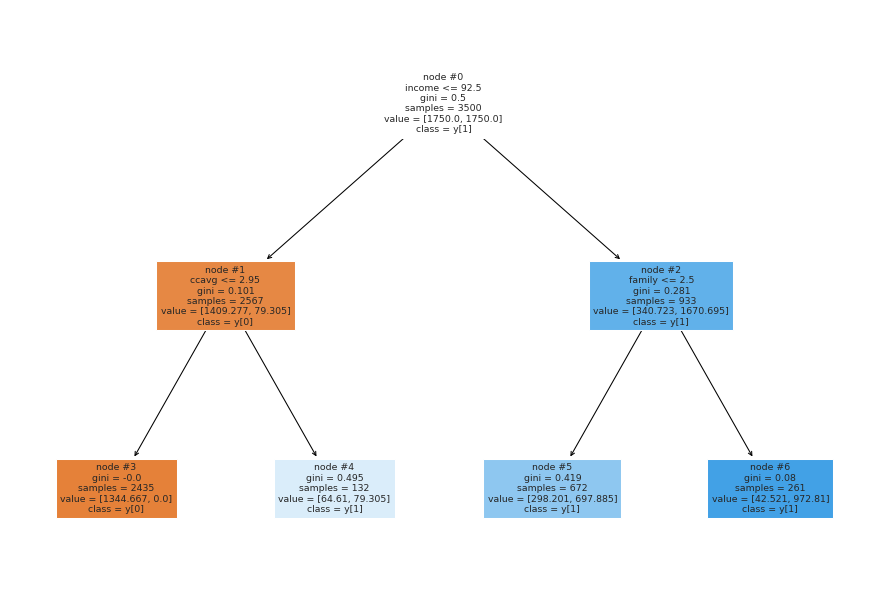

In [52]:
plt.figure(figsize=(15,10), dpi=75)
out = tree.plot_tree(d_tree2, feature_names=feature_names, filled=True, fontsize=9, node_ids=True, class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [53]:
# text report showing the rules of a decision tree
print(tree.export_text(d_tree2,feature_names=feature_names,show_weights=True))


|--- income <= 92.50
|   |--- ccavg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- ccavg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- income >  92.50
|   |--- family <= 2.50
|   |   |--- weights: [298.20, 697.89] class: 1
|   |--- family >  2.50
|   |   |--- weights: [42.52, 972.81] class: 1



### **Feature Importance (2)**


In [54]:
# Gini importance: importance of features in the tree building.
print(pd.DataFrame(d_tree2.feature_importances_, columns = ['Imp'], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                    Imp
income             0.88
ccavg              0.07
family             0.06
age                0.00
zipcode            0.00
mortgage           0.00
securities_account 0.00
cd_account         0.00
online             0.00
creditcard         0.00
education_2        0.00
education_3        0.00


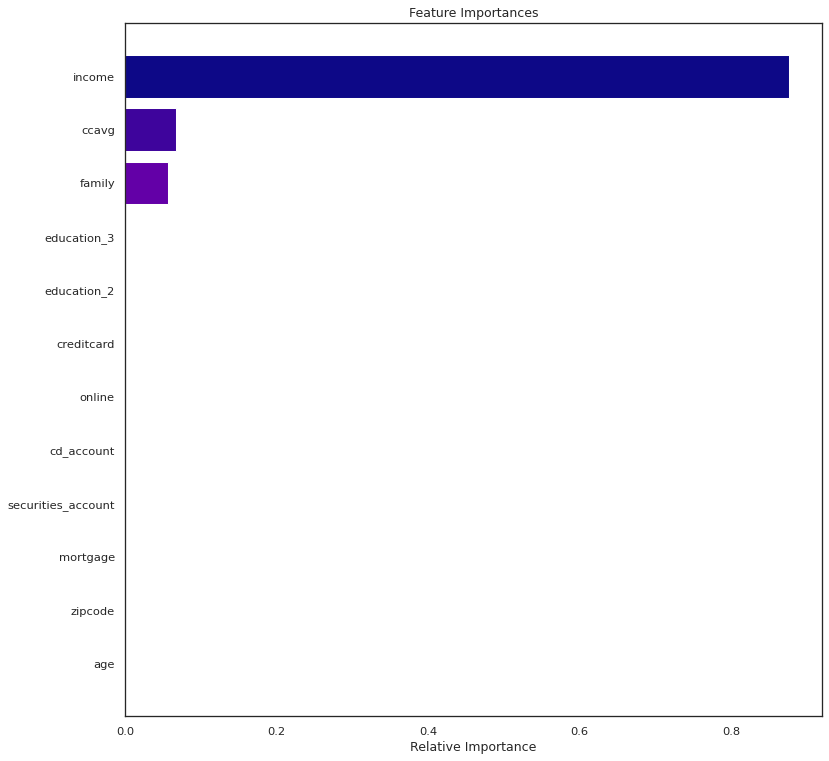

In [55]:
importances = d_tree2.feature_importances_
indices = np.argsort(importances)
cmap = plt.get_cmap('plasma')
colors = cmap(np.linspace(0, 1, len(indices)))[::-1]
plt.figure(figsize=(12, 12), dpi=75)
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.show()


####**Observation**

- Pre-Pruning Strategy: Opting for grid search to refine pre-pruning, acknowledging that a max_depth of 3 may be insufficient.

- Depth Concerns: A shallow depth risks model underfitting.

- Optimization Approach: Exploring methods to identify optimal values.


# Decision Tree: Cost Complexity


###**Post-Pruning: Cost Complexity**


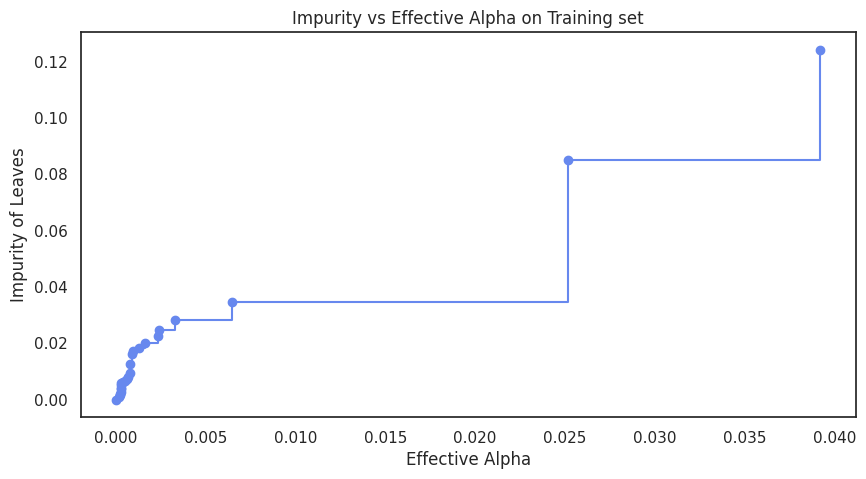

In [56]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

pd.DataFrame(path)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle='steps-post')
ax.set_xlabel('Effective Alpha')
ax.set_ylabel('Impurity of Leaves')
ax.set_title('Impurity vs Effective Alpha on Training set')
plt.show()

Training with Best Alpha Selection: Utilize ccp_alphas for decision tree training

Simplified Pruning Method: Choosing the final ccp_alpha trims the tree down to its most basic structure, resulting in a single-node tree (clfs[-1]).


In [57]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print('Number of nodes in the last tree is: {} with ccp_alpha: {}'.format(
    clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596766


Modifying Tree Collection: Remove the last item from both clfs and ccp_alphas to avoid including the overly simplified single-node tree.

Alpha and Tree Complexity: Illustrate how escalating alpha value leads to a decrease in both the count of nodes and the overall depth of the tree.


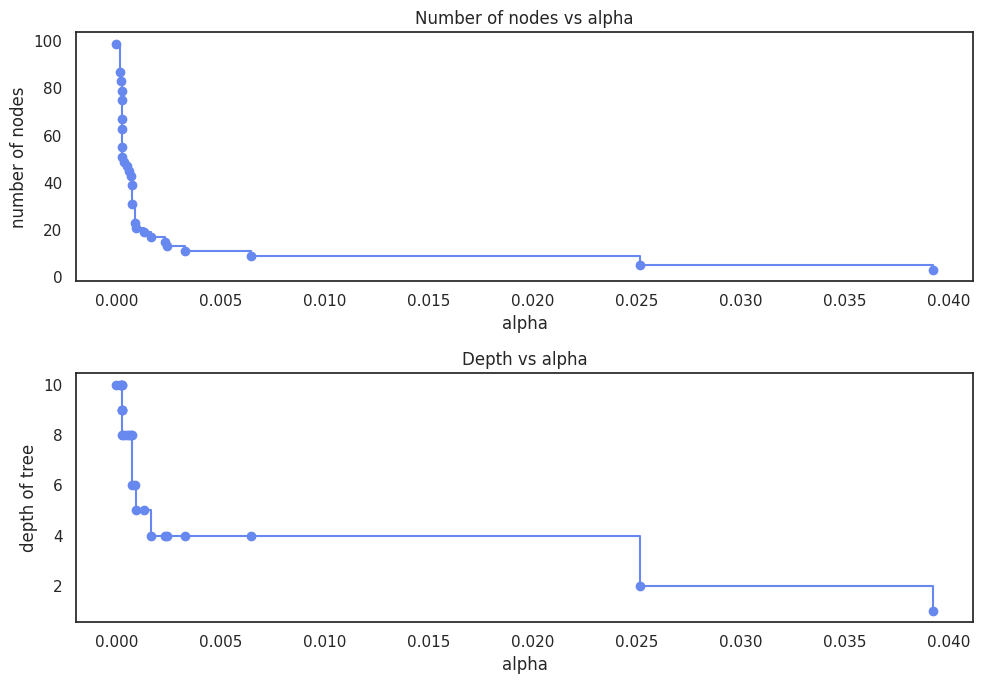

In [58]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle='steps-post')
ax[0].set_xlabel('alpha')
ax[0].set_ylabel('number of nodes')
ax[0].set_title('Number of nodes vs alpha')
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle='steps-post')
ax[1].set_xlabel('alpha')
ax[1].set_ylabel('depth of tree')
ax[1].set_title('Depth vs alpha')
fig.tight_layout()

- Initial Overfitting Scenario: When ccp_alpha is set to zero, the decision tree models the training data completely, leading to overfitting.

- Enhanced Generalization: By incrementing the ccp_alpha value, the tree undergoes further pruning, which helps in developing a decision tree that is more adept at generalizing to new, unseen data.


In [59]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

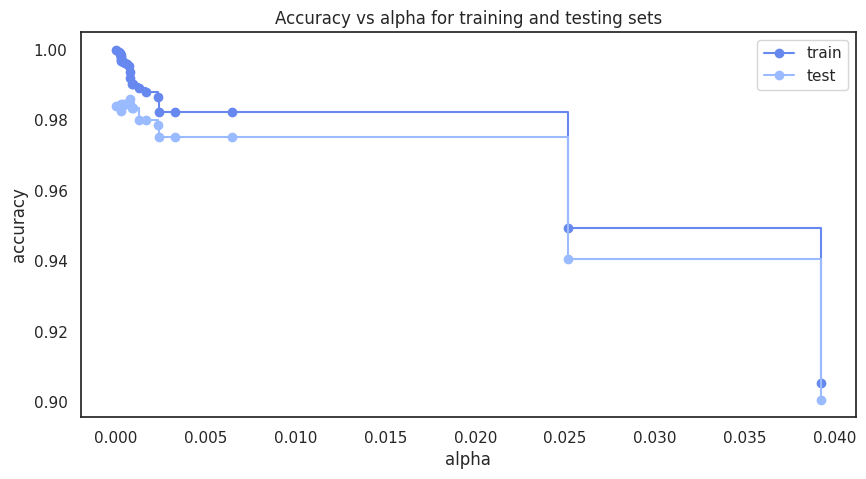

In [60]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train',
        drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test',
        drawstyle='steps-post')
ax.legend()
plt.show()


Optimal Alpha Range: The test accuracy remains stable across a range of alpha values, suggesting an optimal balance between model complexity and generalizability before accuracy drops due to over-pruning.

Training vs. Testing Gap: The consistent gap between higher training and lower testing accuracy implies a natural overfit to the training data that pruning attempts to mitigate.

Over-Pruning Indicator: Sharp declines in accuracy at higher alpha values warn against excessive pruning that leads to model oversimplification and underfitting.


In [61]:
index= np.argmax(test_scores)
d_tree3 = clfs[index]
print(d_tree3)
print('Trainging Model Accuracy:', d_tree3.score(X_train, y_train))
print('Test Model Accuracy:', d_tree3.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.0007619047619047619, random_state=1)
Trainging Model Accuracy: 0.9937142857142857
Test Model Accuracy: 0.986


**Recall vs Alpha**


In [62]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [63]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

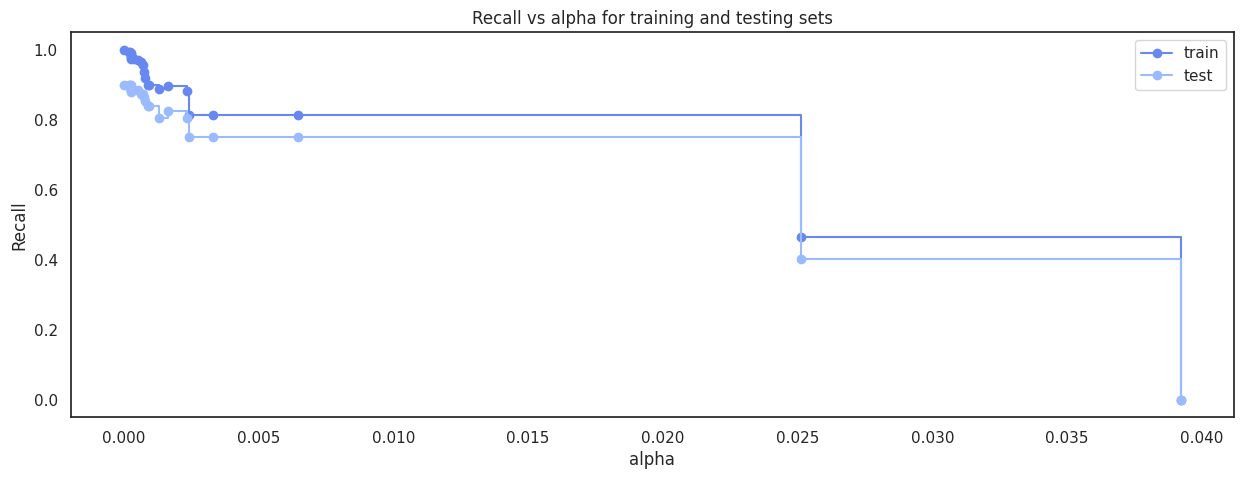

In [64]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel('alpha')
ax.set_ylabel('Recall')
ax.set_title('Recall vs alpha for training and testing sets')
ax.plot(ccp_alphas, recall_train, marker='o', label='train',
        drawstyle='steps-post')
ax.plot(ccp_alphas, recall_test, marker='o', label='test',
        drawstyle='steps-post')
ax.legend()
plt.show()

High Recall Plateau: Recall is stable until a sharp drop, suggesting a pruning limit.

Diverging Recall: Test recall falls off sooner than training, indicating potential overfitting.

Sharp Recall Drops: Sudden falls in recall signal over-pruning and loss of predictive power.


In [65]:
# creating a model with the higest train and terst recall
index = np.argmax(recall_test)
d_tree3 = clfs[index]
print(d_tree3)

DecisionTreeClassifier(random_state=1)


###**Confusion Matrix - Post-pruned Decision Tree**


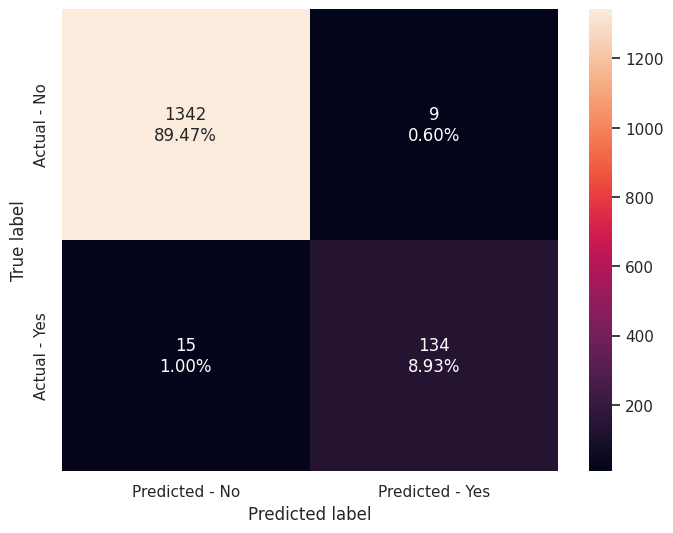

In [66]:
make_confusion_matrix(d_tree3, X_test, y_test)

In [67]:
print("Accuracy on training set : ", d_tree3.score(X_train, y_train))
print("Accuracy on test set : ", d_tree3.score(X_test, y_test))
get_recall_score(d_tree3)

Accuracy on training set :  1.0
Accuracy on test set :  0.984
Recall on training set :  1.0
Recall on test set :  0.8993288590604027


Post-Pruning Process: Results in high recall scores for both training and test datasets, improving the model's ability to generalize.


###**Visualizing the Decision Tree (3)**


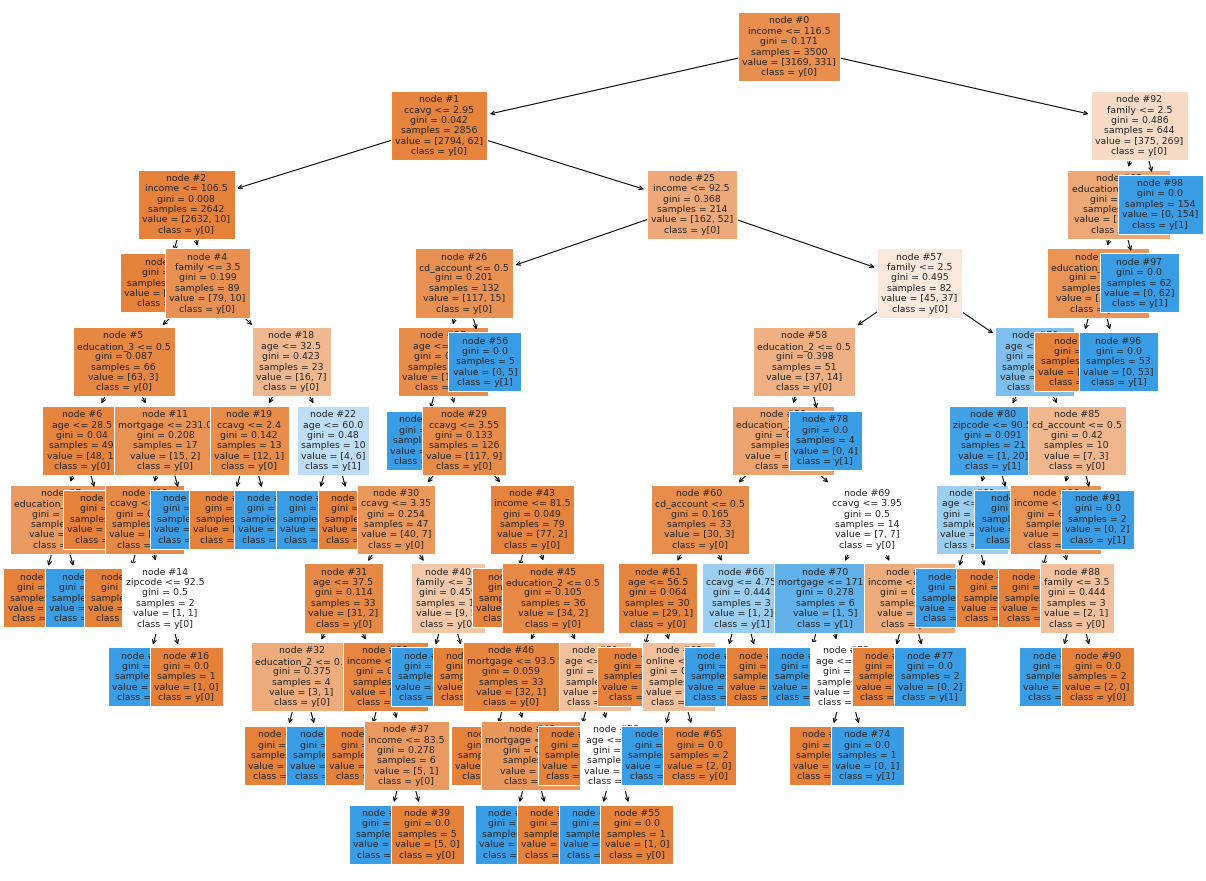

In [68]:
plt.figure(figsize=(20,15), dpi=75)
out = tree.plot_tree(d_tree3, feature_names=feature_names, filled=True, fontsize=9, node_ids=True, class_names=True) #max_depth=6
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [69]:

# text report showing the rules of a decision tree
print(tree.export_text(d_tree3, feature_names=feature_names,show_weights=True))



|--- income <= 116.50
|   |--- ccavg <= 2.95
|   |   |--- income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- income >  106.50
|   |   |   |--- family <= 3.50
|   |   |   |   |--- education_3 <= 0.50
|   |   |   |   |   |--- age <= 28.50
|   |   |   |   |   |   |--- education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- age >  28.50
|   |   |   |   |   |   |--- weights: [43.00, 0.00] class: 0
|   |   |   |   |--- education_3 >  0.50
|   |   |   |   |   |--- mortgage <= 231.00
|   |   |   |   |   |   |--- ccavg <= 1.95
|   |   |   |   |   |   |   |--- weights: [14.00, 0.00] class: 0
|   |   |   |   |   |   |--- ccavg >  1.95
|   |   |   |   |   |   |   |--- zipcode <= 92.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |--- zipcode >  92.50
|   

### **Feature Importance (3)**


In [70]:
# Gini importance: importance of features in the tree building.
print(pd.DataFrame(d_tree3.feature_importances_, columns = ['Imp'], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                    Imp
income             0.31
family             0.26
education_2        0.17
education_3        0.14
ccavg              0.05
age                0.03
cd_account         0.02
mortgage           0.01
zipcode            0.00
online             0.00
securities_account 0.00
creditcard         0.00


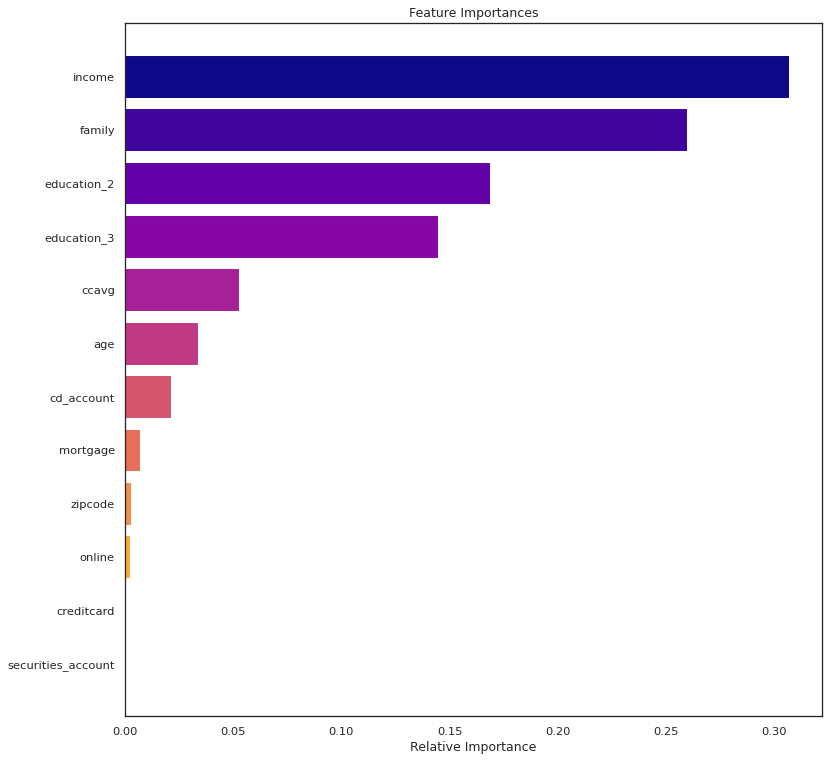

In [71]:
importances = d_tree3.feature_importances_
indices = np.argsort(importances)
cmap = plt.get_cmap('plasma')
colors = cmap(np.linspace(0, 1, len(indices)))[::-1]
plt.figure(figsize=(12, 12), dpi=75)
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.show()

In [72]:
print("Accuracy on training set : ", d_tree3.score(X_train, y_train))
print("Accuracy on test set : ", d_tree3.score(X_test, y_test))
get_recall_score(d_tree3)

Accuracy on training set :  1.0
Accuracy on test set :  0.984
Recall on training set :  1.0
Recall on test set :  0.8993288590604027


**_Observation_**:

Key Influential Factor: Income emerges as the most significant feature

Simplified Model Design: The Decision Tree is made more concise and straightforward

Accuracy on Training Data: 100%

Accuracy on Testing Data: 98.6%

Training Set Recall: 100%

Test Set Recall: 91.2%


## Model Comparison and Final Model Selection


In [ ]:
def model_scores(model, X_train, X_test, y_train, y_test):
    score_list = []
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    recall_train = metrics.recall_score(y_train,pred_train)
    recall_test = metrics.recall_score(y_test,pred_test)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)

    score_list.extend((accuracy_train, accuracy_test, recall_train, recall_test))

    return score_list

score_dtree = model_scores(d_tree, X_train, X_test, y_train, y_test)
score_dtree2 = model_scores(d_tree2, X_train, X_test, y_train, y_test)
score_dtree3 = model_scores(d_tree3, X_train, X_test, y_train, y_test)

scores_arr = [score_dtree , score_dtree2, score_dtree3]

df_comp = pd.DataFrame(scores_arr,
index=[ 'Decision Tree',
        'Decision Tree - Hyperparameter Tuned',
        'Decision Tree - Post-pruning',
        ],
columns=['Train Accuracy', 'Test Accuracy', 'Train Recall', 'Test Recall'])

for col in df_comp.columns.to_list():
    df_comp[col] = (round(df_comp[col] * 100, 0)).astype(int)

df_comp


,Train Accuracy,Test Accuracy,Train Recall,Test Recall
Decision Tree,100,98,100,90
Decision Tree - Hyperparameter Tuned,79,78,100,100
Decision Tree - Post-pruning,100,98,100,90
